In [26]:
import re

import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib import pyplot as plt

from plotnine import *
from plotnine.data import *
from plotnine.labels import *
from plotnine.themes import *
from mizani.formatters import label_number

# Projeto 1 - IA376 - Unicamp

# Análise da taxa de transição das escolas brasileiras 

Esse notebook apresenta uma análise sobre a progressão escolar dos estudantes brasileiros no período de 2008 até 2021 utilizando o indicador educacional **taxa de transição**, que tem como por objetivo trazer informações sobre a trajetória dos estudantes do fundamental até o ensino médio.

## O que é taxa de transição

As taxas de rendimento escolar são informações produzidas anualmente pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep), por meio dos dados coletados pelo Censo Escolar da Educação Básica, e são fundamentais para a verificação e o acompanhamento dos dados da escola e do município. Além disso, as taxas de rendimento são variáveis incorporadas ao cálculo do Índice de Desenvolvimento da Educação Básica (Ideb), indicador de qualidade educacional produzido e divulgado a cada dois anos pelo Inep, que congrega as informações de desempenho dos estudantes nos testes padronizados do Sistema de Avaliação da Educação Básica (Saeb) com as informações de rendimento escolar (aprovação).

- **Taxa de promocao:** É a proporção de alunos da matrícula total na série k, no ano t, que são aprovados.
- **Taxa de evasao:**  É a proporção de alunos da matrícula total na série k, no ano t, que abandonaram a escola.
- **Taxa de repetencia:** É a proporção de alunos da matrícula total na série k, no ano t, que são reprovados.


Fonte: [Indicadores de Rendimento Escolar e Fluxo Escolar](https://professor.ufop.br/sites/default/files/danielmatos/files/indicadores_confeccionados_com_dados_do_inep.pdf)

Fonte: [Taxas de Rendimento Escolar](https://www.gov.br/inep/pt-br/centrais-de-conteudo/acervo-linha-editorial/publicacoes-institucionais/estatisticas-e-indicadores-educacionais/taxas-de-rendimento-escolar#:~:text=As%20taxas%20de%20rendimento%20escolar,da%20escola%20e%20do%20munic%C3%ADpio.)

## Dados

A fonte dos dados é o [INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/taxas-de-rendimento-escolar), e foram obtidos através do [site base de dados](https://basedosdados.org/dataset/63f1218f-c446-4835-b746-f109a338e3a1?table=23c83e1b-ba8e-4d20-b3bb-11ef7bc4ab08).

O dataset contém as seguintes informações entre os anos de **2008 a 2021**:
- As taxas estão apresentadas por estado
- Rede
    - Pública
    - Privada
- Localização: área rural ou urbana
- Taxas: 
    - Promocao
    - Repetencia
    - Evasao
    - Migracao


## Perguntas

A seguir estão alguns questionamentos que serão respondidos durante a analise. Eles apresentam perguntas importantes que visam propor analises sobre a evolução das taxas de trasição de ensino no país.

> Progressão, repetencia e evasão ao longo de todos os anos

> A progressão é maior na área rural ou urbana?

> Qual **estado** tem a maior taxa de progressão e evasao ao longo dos anos?

> Qual **região** tem a maior taxa de progressão e evasao ao longo dos anos?

> Como evouluiu as taxas de promoção, evasão e repetência no primeiro ano de pandemia

> Como os estudantes brasileiros estão progredindo de ano?

## Hipótese

Além das perguntas, ao final da análise será apresentado a resposta para seguinte hipótese:

> As escolas públicas possuem maior taxa de progressão do que as privadas

Essa hipótese surge a partir da chamada [progressão continuada](https://www.bbc.com/portuguese/articles/c72y0zqnvk1o) presente na rede pública em alguns estados do país. Essa regra estabelecida por algumas secretarias de ensino, define que alunos com desempenho abaixo do esperado vão receber aulas de reforço ao invés de serem reprovados, isso a cada ciclo de 3 anos. Será q

Estados que possuem progressão continuada:

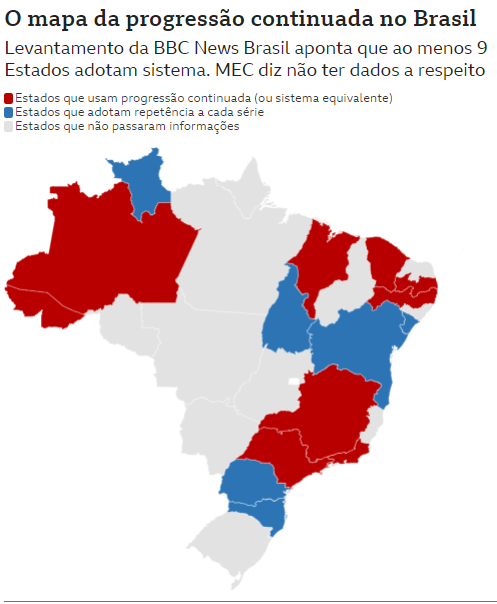

Fonte: [progressão continuada](https://www.bbc.com/portuguese/articles/c72y0zqnvk1o)

## Ferramentas utilizadas

Para ser possivel analisar esses dados foram utilizadas as seguintes ferramentas:

- Leitura e organização dos dados: 
    - Pandas: Biblioteca utilizada para carregar, organizar e limpar os dados
- Visualização de dados:
    - Plotnine: Foi utilizada para plotar a maioria dos gráficos deste relatório, pois é fácil de utilizar, configurar e coloca os gráficos em escala por padrão.
    - Geopandas: Biblioteca utilizada para carregar dados geográficos do estados do país e assim ser possível plotar um mapa.
    - matplotlib: Utilizada para plotar os mapas.
    - Seaborn: Neste projeto foi utilizado a paleta de cores dessa biblioteca
- Formatação e filtragem de textos e números
    - Regex: Utilizado para filtrar alguns textos, auxiliando na organização dos dados.
    - Mizanni formatter: Utilizado para formatar as escalas dos gráficos, inserindo simbolos como %.

## Importação e limpeza dos dados

O primeiro passo é carregar os dados e analisar através da função info se há informações faltantes e se os tipos das colunas estão corretos

In [27]:
df_raw = pd.read_csv("data/inep_transicao_estado.csv.gz")

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ano                                 1890 non-null   int64  
 1   sigla_uf                            1890 non-null   object 
 2   localizacao                         1890 non-null   object 
 3   rede                                1890 non-null   object 
 4   taxa_promocao_ef                    1890 non-null   float64
 5   taxa_promocao_ef_anos_iniciais      1890 non-null   float64
 6   taxa_promocao_ef_anos_finais        1890 non-null   float64
 7   taxa_promocao_ef_1_ano              1890 non-null   float64
 8   taxa_promocao_ef_2_ano              1890 non-null   float64
 9   taxa_promocao_ef_3_ano              1890 non-null   float64
 10  taxa_promocao_ef_4_ano              1890 non-null   float64
 11  taxa_promocao_ef_5_ano              1890 no

Olhando algumas estatisticas dos dados, podemos conferir que a coluna comprova o período de anos esperado para o dataset de 2008 a 2021 

In [28]:
df_raw.describe()

,ano,taxa_promocao_ef,taxa_promocao_ef_anos_iniciais,taxa_promocao_ef_anos_finais,taxa_promocao_ef_1_ano,taxa_promocao_ef_2_ano,taxa_promocao_ef_3_ano,taxa_promocao_ef_4_ano,taxa_promocao_ef_5_ano,taxa_promocao_ef_6_ano,...,taxa_migracao_eja_ef_4_ano,taxa_migracao_eja_ef_5_ano,taxa_migracao_eja_ef_6_ano,taxa_migracao_eja_ef_7_ano,taxa_migracao_eja_ef_8_ano,taxa_migracao_eja_ef_9_ano,taxa_migracao_eja_em,taxa_migracao_eja_em_1_ano,taxa_migracao_eja_em_2_ano,taxa_migracao_eja_em_3_ano
count,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,...,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000
mean,2014.500000,86.060582,89.157354,82.007672,94.269101,90.138730,86.491058,88.804815,88.151640,80.578201,...,0.306508,0.727460,1.902116,2.774974,2.743757,2.184286,2.239630,2.935397,2.398677,0.895608
std,4.032196,7.666824,7.081946,9.188975,3.950990,9.224082,8.439545,7.763740,7.887825,11.588508,...,0.376444,0.773436,1.724481,2.202182,1.936240,1.518951,1.706327,2.213831,1.957525,0.883348
min,2008.000000,57.400000,54.300000,57.300000,66.500000,45.700000,53.900000,57.400000,51.700000,49.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,80.800000,85.100000,75.200000,92.600000,87.500000,80.300000,84.100000,82.725000,72.300000,...,0.000000,0.100000,0.400000,0.700000,0.900000,0.900000,0.900000,1.200000,0.900000,0.200000
50%,2014.500000,86.400000,90.600000,81.200000,95.400000,93.500000,87.300000,89.900000,89.900000,80.200000,...,0.200000,0.400000,1.300000,2.200000,2.400000,2.200000,1.800000,2.600000,1.700000,0.600000
75%,2018.000000,92.700000,94.800000,90.500000,97.000000,96.400000,94.100000,95.600000,94.500000,91.900000,...,0.500000,1.300000,3.100000,4.600000,4.400000,3.200000,3.200000,4.200000,3.500000,1.300000
max,2021.000000,98.600000,98.900000,98.700000,99.300000,99.100000,99.400000,99.600000,99.300000,99.100000,...,1.800000,3.900000,7.900000,9.200000,7.900000,20.000000,12.800000,22.300000,9.800000,5.500000


A seguir foi vericado as colunas do tipo object que representam variaveis como string. A coluna sigla_uf apresenta a quantidade de dados esperada, pois temos 27 estados no Brasil.

Para outras duas colunas um sinal de alerta, pois esperavamos 3 valores para cada uma delas.

In [29]:
df_raw.describe(include=object)

,sigla_uf,localizacao,rede
count,1890,1890,1890
unique,27,6,6
top,AC,total,total
freq,70,972,972


Como obeservado anteriormente a coluna rede e localização possuem valores inconsistentes, será necessário corrigi-los antes de progressir. A solução é simples, converter todos os dados na coluna para minúsculo e substituir Pública por publica.

In [30]:
print("Anteriormente:")
print(df_raw["localizacao"].unique())
print(df_raw["rede"].unique())

df_raw["rede"] = df_raw["rede"].apply(str.lower)
df_raw["rede"] = df_raw["rede"].replace({"pública": "publica"})

df_raw["localizacao"] = df_raw["localizacao"].apply(str.lower)

print("\nApós corrigir:")
print(df_raw["localizacao"].unique())
print(df_raw["rede"].unique())

Anteriormente:
['Total' 'total' 'rural' 'Urbana' 'urbana' 'Rural']
['Privada' 'privada' 'total' 'Total' 'publica' 'Pública']

Após corrigir:
['total' 'rural' 'urbana']
['privada' 'total' 'publica']


Para facilitar durante geração de gráficos, as seguintes colunas rede e localizacao foram convertidas para o tipo categórico

In [31]:
df_raw["localizacao"] = pd.Categorical(
    df_raw["localizacao"], ["urbana", "rural", "total"]
)
df_raw["rede"] = pd.Categorical(df_raw["rede"], ["publica", "privada", "total"])

Não será feita nenhuma analise a respeito da taxa de migracao para o eja, assim, a seguir as colunas referentes a esta informação foram removidas através de uma regex.

In [32]:
drop_cols = df_raw.filter(regex="taxa_migracao_eja").columns

df_raw = df_raw.drop(columns=drop_cols)
df_raw.columns

Index(['ano', 'sigla_uf', 'localizacao', 'rede', 'taxa_promocao_ef',
       'taxa_promocao_ef_anos_iniciais', 'taxa_promocao_ef_anos_finais',
       'taxa_promocao_ef_1_ano', 'taxa_promocao_ef_2_ano',
       'taxa_promocao_ef_3_ano', 'taxa_promocao_ef_4_ano',
       'taxa_promocao_ef_5_ano', 'taxa_promocao_ef_6_ano',
       'taxa_promocao_ef_7_ano', 'taxa_promocao_ef_8_ano',
       'taxa_promocao_ef_9_ano', 'taxa_promocao_em', 'taxa_promocao_em_1_ano',
       'taxa_promocao_em_2_ano', 'taxa_promocao_em_3_ano',
       'taxa_repetencia_ef', 'taxa_repetencia_ef_anos_iniciais',
       'taxa_repetencia_ef_anos_finais', 'taxa_repetencia_ef_1_ano',
       'taxa_repetencia_ef_2_ano', 'taxa_repetencia_ef_3_ano',
       'taxa_repetencia_ef_4_ano', 'taxa_repetencia_ef_5_ano',
       'taxa_repetencia_ef_6_ano', 'taxa_repetencia_ef_7_ano',
       'taxa_repetencia_ef_8_ano', 'taxa_repetencia_ef_9_ano',
       'taxa_repetencia_em', 'taxa_repetencia_em_1_ano',
       'taxa_repetencia_em_2_ano', 'taxa_

## Análise dos dados

**Para os dados da rede não há informação de localização**, por exemplo, não é possível filtrar por rede publica e urbana, sendo assim, foi gerado duas tabelas com a função abaixo, uma para cada tipo macro de informação (rede e localização) afim de facilitar a geração de gráficos e filtragem dos dados

In [33]:
def get_macro_table(first_var, second_var):
    taxa_list = ["promocao", "evasao", "repetencia"]

    df_by_ensino = pd.DataFrame()
    for taxa in taxa_list:
        taxa_type = f"taxa_{taxa}"

        df_by_rede = df_raw.query(f"{first_var} != 'total' and {second_var} == 'total'")
        df_by_rede = df_by_rede.filter(
            ["ano", first_var, "sigla_uf", f"{taxa_type}_ef", f"{taxa_type}_em"]
        )

        df_by_rede = df_by_rede.groupby(
            [first_var, "ano", "sigla_uf"], observed=False
        ).mean()
        df_by_rede = df_by_rede.reset_index()
        df_by_rede["ensino"] = None

        df_aux = pd.DataFrame()
        for en in ["em", "ef"]:
            df_ensino = df_by_rede[
                [first_var, "ano", "sigla_uf", "ensino", f"{taxa_type}_{en}"]
            ].rename(columns={f"{taxa_type}_{en}": f"{taxa_type}"})

            df_ensino["ensino"] = en
            df_ensino["valor"] = df_ensino[f"{taxa_type}"]
            df_ensino["taxa"] = taxa
            df_ensino.drop(columns=f"{taxa_type}", inplace=True)

            df_aux = pd.concat([df_aux, df_ensino])

        df_aux.replace(
            {"em": "Ensino médio", "ef": "Ensino fundamental"},
            inplace=True,
        )

        df_by_ensino = pd.concat([df_by_ensino, df_aux])

    df_by_ensino.query(f"{first_var} != 'total'", inplace=True)

    df_by_ensino["taxa"] = pd.Categorical(df_by_ensino["taxa"], taxa_list)
    df_by_ensino["ensino"] = pd.Categorical(
        df_by_ensino["ensino"], ["Ensino fundamental", "Ensino médio"]
    )

    df_by_ensino.sort_values("ano", inplace=True, ignore_index=True)

    return df_by_ensino


df_ensino_rede = get_macro_table("rede", "localizacao")
df_ensino_loc = get_macro_table("localizacao", "rede")

print("Dataframe com dados por rede (publica ou privada)")
display(df_ensino_rede.head())

print("Dataframe com dados por localizao (rural ou urbana)")
display(df_ensino_loc.head())

Dataframe com dados por rede (publica ou privada)


,rede,ano,sigla_uf,ensino,valor,taxa
0,publica,2008,PE,Ensino médio,60.1,promocao
1,publica,2008,PB,Ensino médio,64.8,promocao
2,publica,2008,PA,Ensino médio,58.1,promocao
3,publica,2008,MT,Ensino médio,66.5,promocao
4,publica,2008,MS,Ensino médio,64.9,promocao


Dataframe com dados por localizao (rural ou urbana)


,localizacao,ano,sigla_uf,ensino,valor,taxa
0,urbana,2008,PE,Ensino médio,63.3,promocao
1,urbana,2008,PB,Ensino médio,67.0,promocao
2,urbana,2008,PA,Ensino médio,60.2,promocao
3,urbana,2008,MT,Ensino médio,68.3,promocao
4,urbana,2008,MS,Ensino médio,68.5,promocao


Seguindo as regras do padrão [tidy](https://medium.com/datapsico/organizando-banco-de-dados-uma-introducao-ao-conceito-de-tidy-data-1296815aa100), vamos colocar todas as informações necessárias para o gráfico em uma mesma tabela. 

Abaixo está sendo adicionada uma coluna referente as regiões do Brasil, ela foi criada a partir da coluna sigla_uf e um dicionario que discretiza cada região do país conforme a UF.

In [34]:
def add_region(df):
    dict_regions = {
        "Sudeste": ["SP", "RJ", "ES", "MG"],
        "Norte": ["AC", "AM", "AP", "PA", "TO", "RR", "RO"],
        "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
        "Centro-Oeste": ["DF", "GO", "MT", "MS"],
        "Sul": ["PR", "RS", "SC"],
    }

    df["regiao"] = None
    for key, value in dict_regions.items():
        mask = df["sigla_uf"].isin(dict_regions[key])
        df.loc[mask, "regiao"] = key

    return df


df_ensino_rede = add_region(df_ensino_rede.copy())
df_ensino_rede["rede"] = df_ensino_rede["rede"].cat.remove_unused_categories()

df_ensino_loc = add_region(df_ensino_loc.copy())
df_ensino_loc["localizacao"] = df_ensino_loc[
    "localizacao"
].cat.remove_unused_categories()

print("Dataframe com dados por rede (publica ou privada)")
display(df_ensino_rede.head())

print("Dataframe com dados por localizao (rural ou urbana)")
display(df_ensino_loc.head())

Dataframe com dados por rede (publica ou privada)


,rede,ano,sigla_uf,ensino,valor,taxa,regiao
0,publica,2008,PE,Ensino médio,60.1,promocao,Nordeste
1,publica,2008,PB,Ensino médio,64.8,promocao,Nordeste
2,publica,2008,PA,Ensino médio,58.1,promocao,Norte
3,publica,2008,MT,Ensino médio,66.5,promocao,Centro-Oeste
4,publica,2008,MS,Ensino médio,64.9,promocao,Centro-Oeste


Dataframe com dados por localizao (rural ou urbana)


,localizacao,ano,sigla_uf,ensino,valor,taxa,regiao
0,urbana,2008,PE,Ensino médio,63.3,promocao,Nordeste
1,urbana,2008,PB,Ensino médio,67.0,promocao,Nordeste
2,urbana,2008,PA,Ensino médio,60.2,promocao,Norte
3,urbana,2008,MT,Ensino médio,68.3,promocao,Centro-Oeste
4,urbana,2008,MS,Ensino médio,68.5,promocao,Centro-Oeste


### Progressão, repetencia e evasão ao longo de todos os anos

Com a tabela pronta para o plot, através do plotnine foram gerados os gráficos a seguir que apresentam as taxas de promoção, repetencia e evasao em um período de 13 anos.

> A partir da análise dos gráficos, nota-se que as taxas de repetencia e evasão na rede pública são mais altas que na rede privada. Detalhe no ensino médio que apresenta uma taxa de evasão com mediana em 13% ao longo dos 13 anos, cerca de 4x maior do que a mesma taxa para o ensimo fundamental. Com relação a taxa de promoção, ela é mais alta na rede privada, 
>
> Importante notar que o IRQ das escolas privadas são menores, demostrando que há uma uniformidade maior entre a taxa de progressão dos alunos em diferentes estados e ao longo dos anos
>
> **Detalhe importante nesse gráfico são os dois outliers** que aparecem, mais para frente será explicado por que eles existem

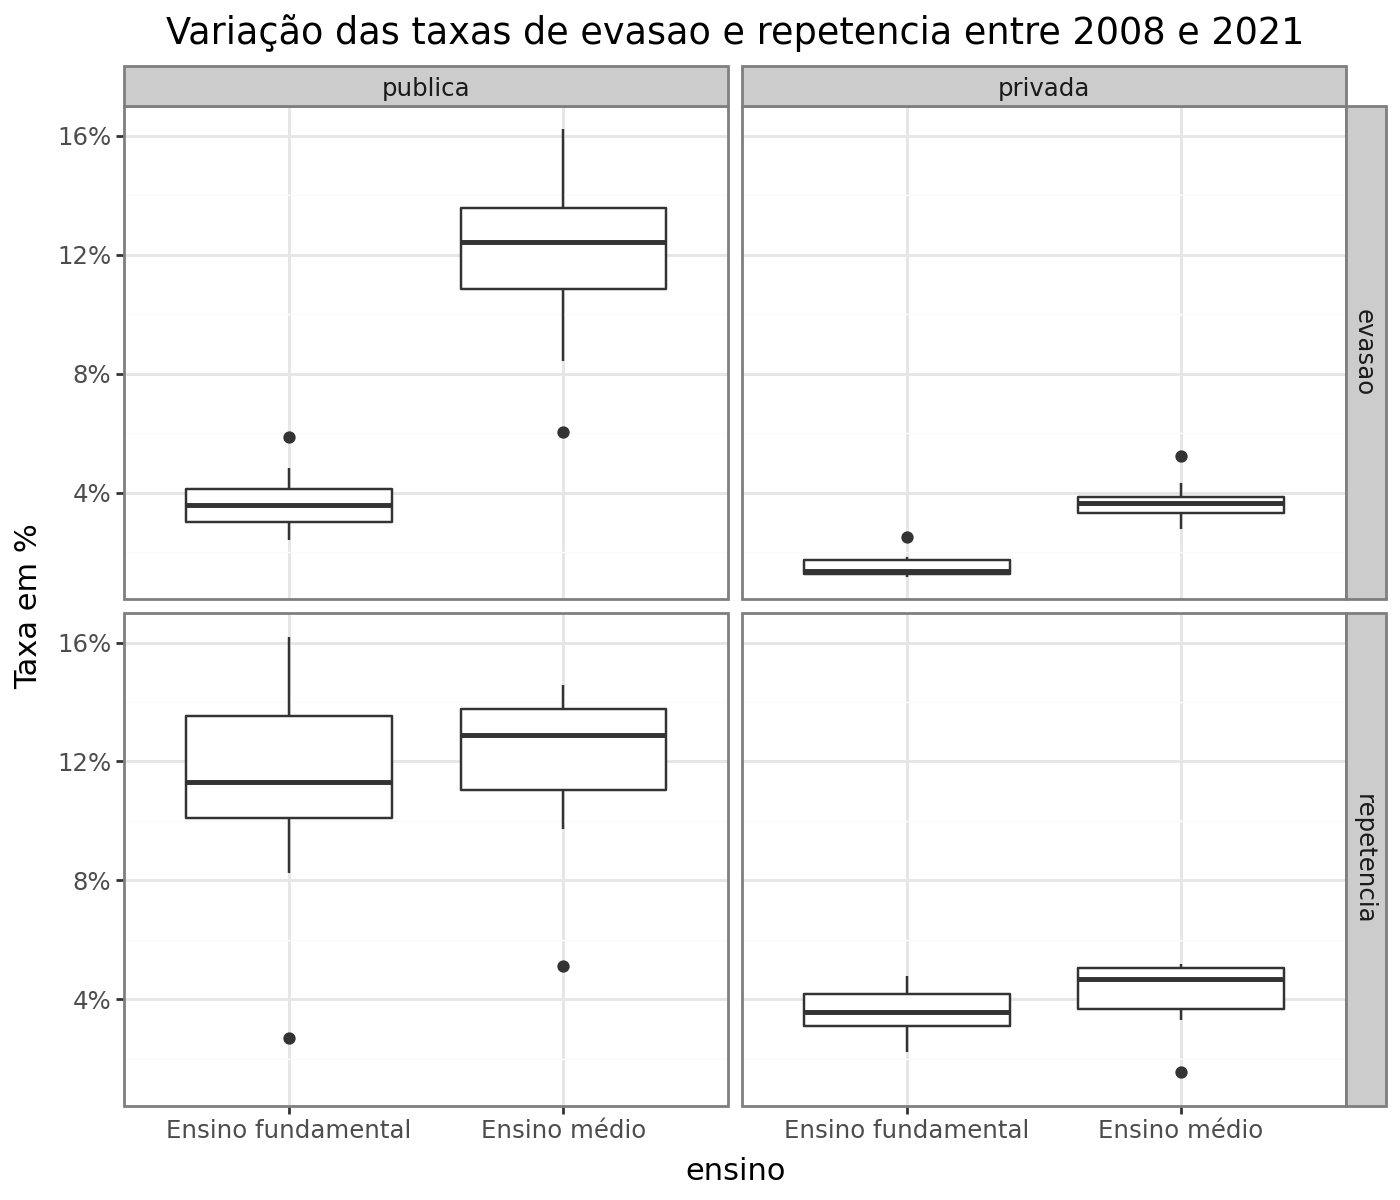

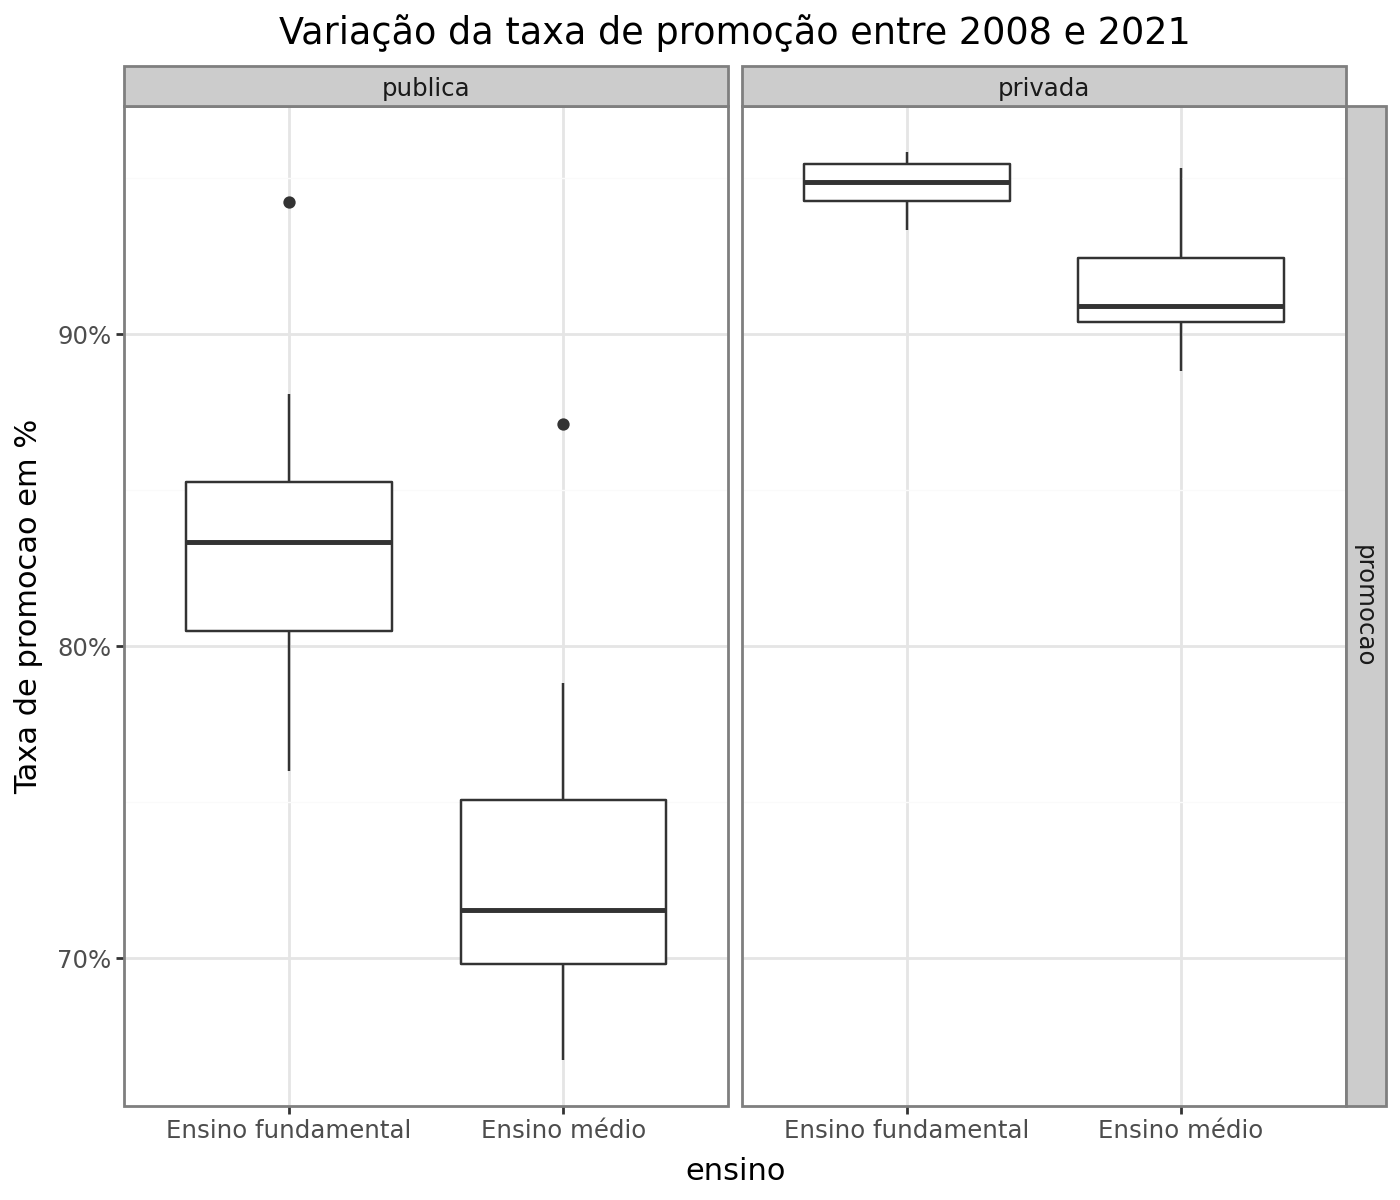

In [35]:
df_ensino_rede_gruop = (
    df_ensino_rede.groupby(["rede", "ano", "taxa", "ensino"], observed=True)[["valor"]]
    .mean()
    .reset_index()
)

display(
    ggplot(
        data=df_ensino_rede_gruop.query("taxa != 'promocao'"),
        mapping=aes(x="ensino", y="valor"),
    )
    + geom_boxplot()
    + facet_grid("taxa", "rede")
    + scale_y_continuous(labels=label_number(suffix="%"))
    + theme_bw()
    + theme(figure_size=(7, 6))
    + ylab("Taxa em %")
    + ggtitle("Variação das taxas de evasao e repetencia entre 2008 e 2021")
)


display(
    ggplot(
        data=df_ensino_rede_gruop.query("taxa == 'promocao'"),
        mapping=aes(x="ensino", y="valor"),
    )
    + geom_boxplot()
    + facet_grid("taxa", "rede")
    + scale_y_continuous(labels=label_number(suffix="%"))
    + theme_bw()
    + theme(figure_size=(7, 6))
    + ylab("Taxa de promocao em %")
    + ggtitle("Variação da taxa de promoção entre 2008 e 2021")
)

### A progressão é maior na área rural ou urbana?

O gráfico a seguir apresenta a taxa de promoção tanto para o ensino médio quanto fundamental separadas por rural e urbana.

> A partir da analise, nota-se que a taxa promoção para o ensino fundamental na zona urbana é maior que na zona rural, a evasão é um pouco parecida sendo maior na região rural, e a taxa de repetencia é maior na zona rural, os dois podem estar sendo causados pela dificuldade dos alunos em acompanhar as matérias ou falta de infraestrutura para que eles consigam consigam assistir a aula com qualidade

Portanto, a progressão é maior na zona urbana para o ensino fundamental e na rural e maior para ensino médio

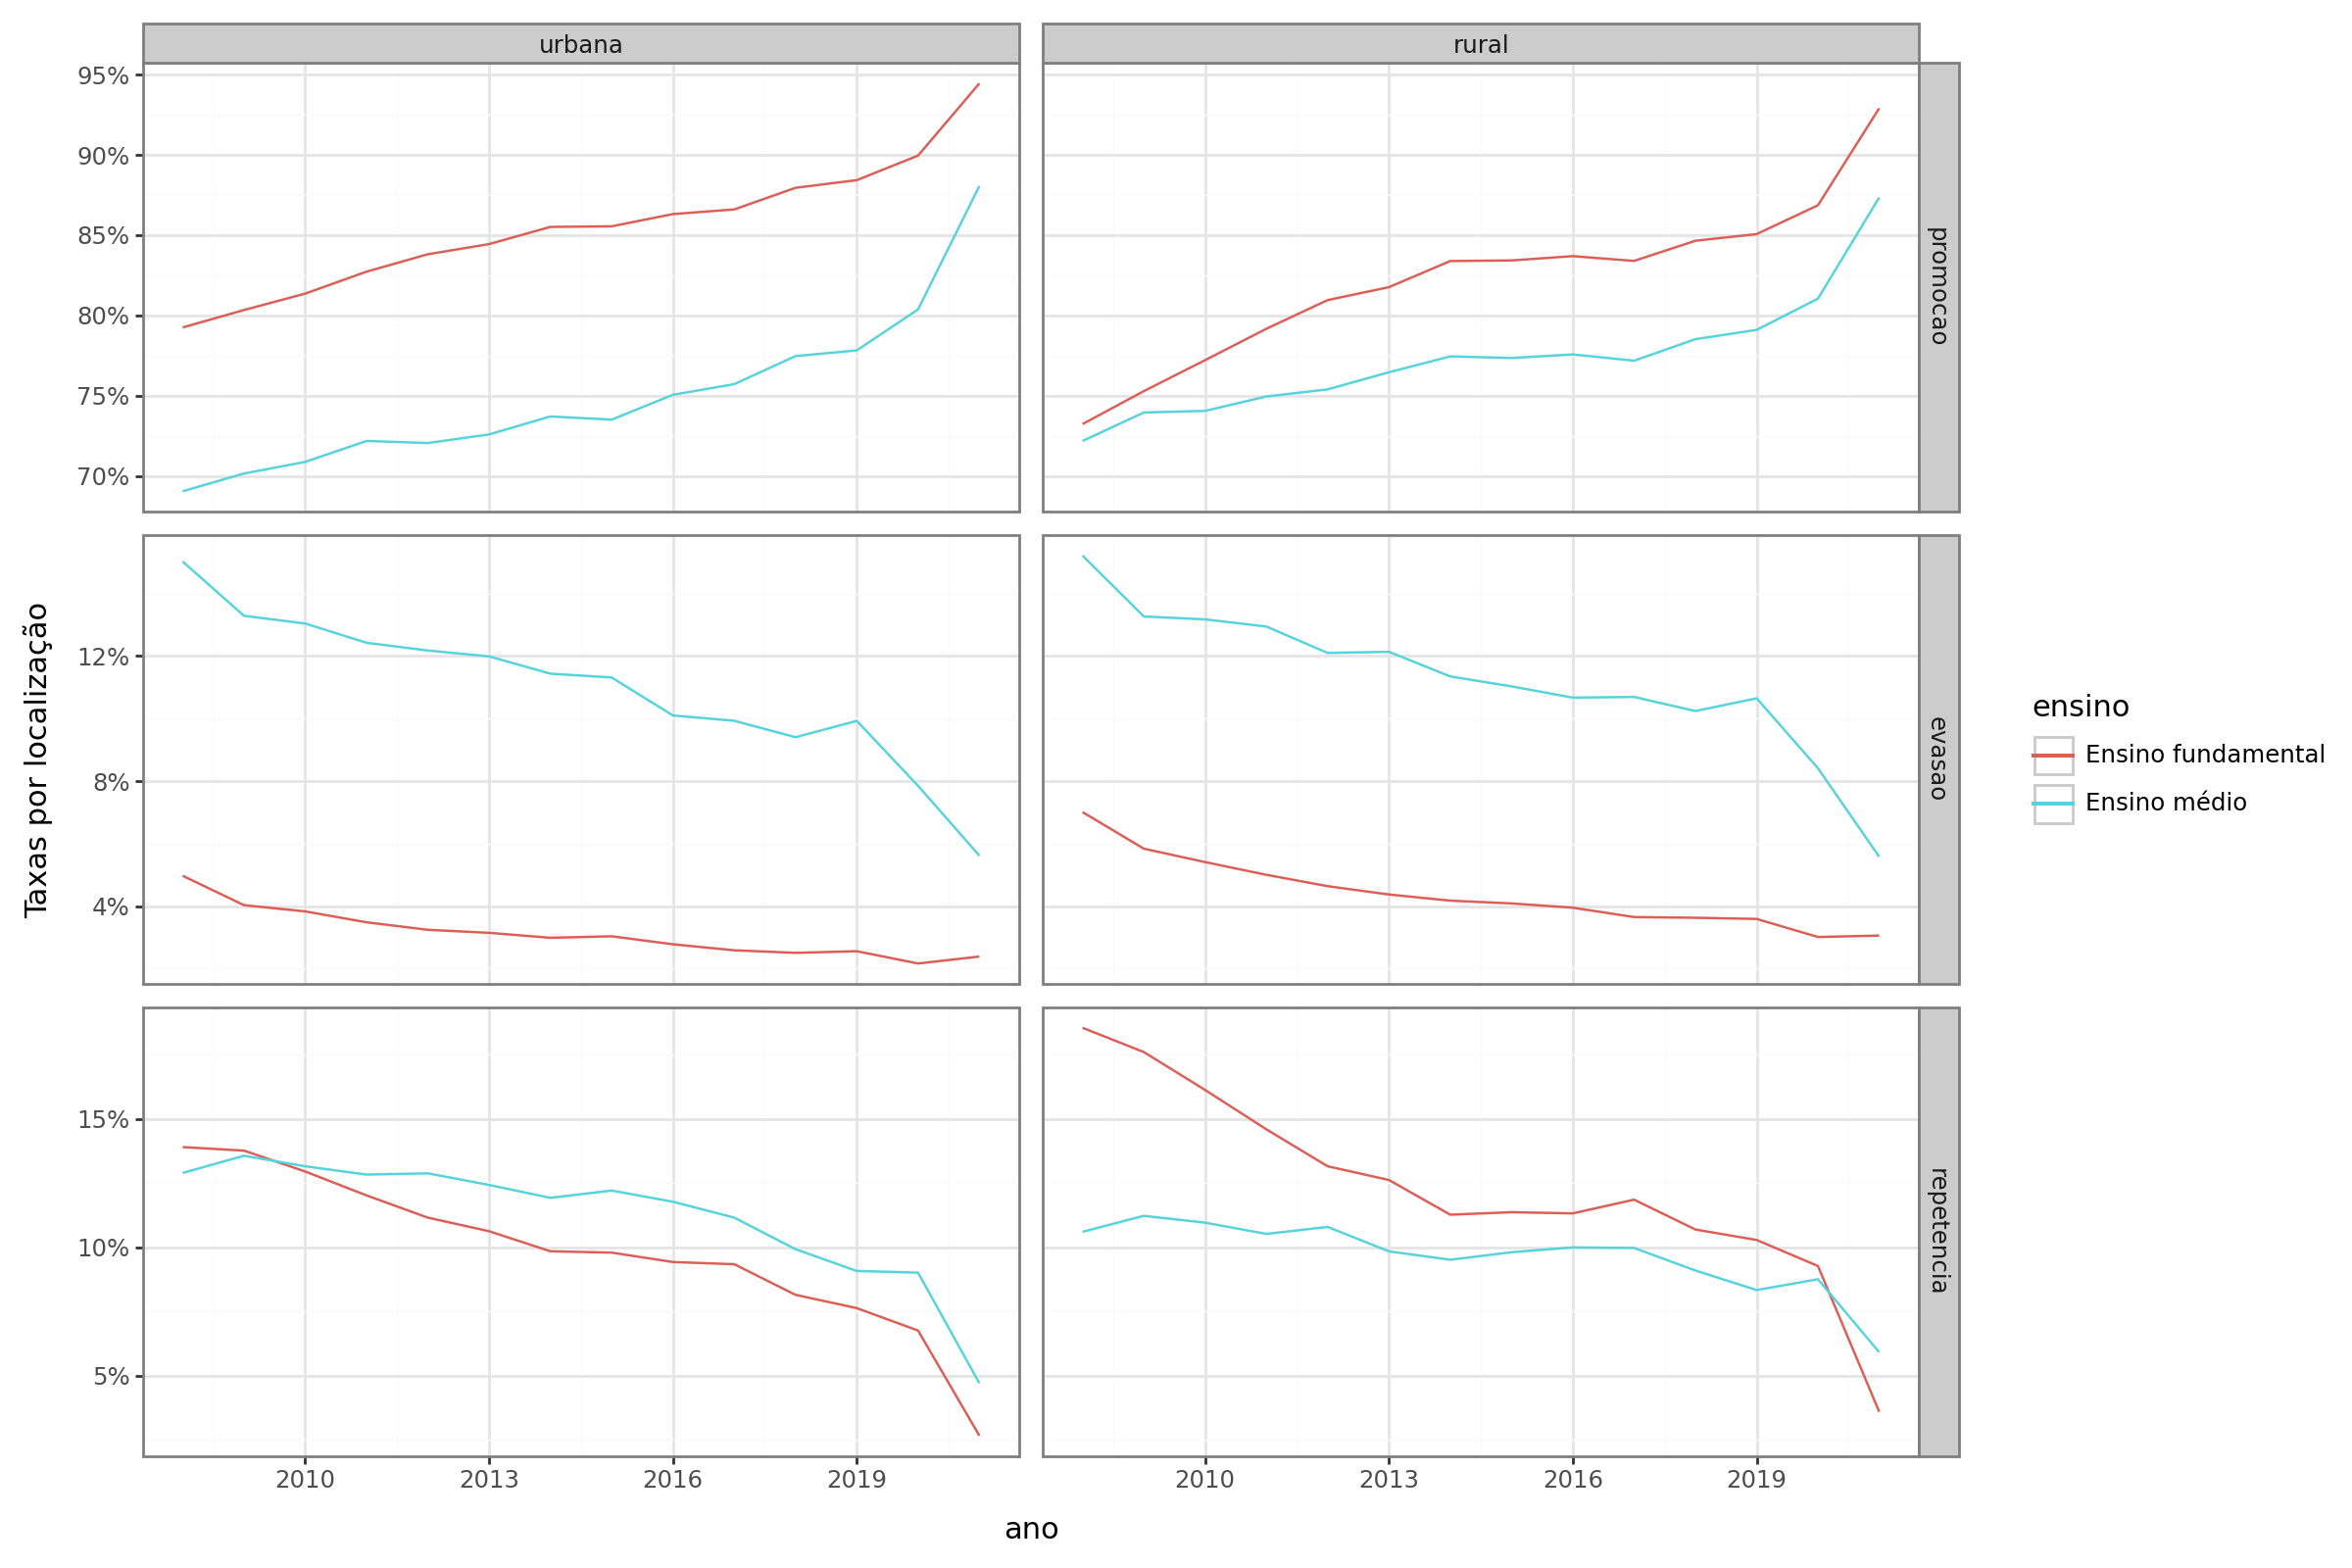

In [36]:
df_ensino_loc_group = (
    df_ensino_loc.groupby(["localizacao", "ensino", "taxa", "ano"], observed=True)[
        ["valor"]
    ]
    .mean()
    .reset_index()
)

(
    ggplot(data=df_ensino_loc_group, mapping=aes(show_legend=True))
    + geom_line(mapping=aes(x="ano", y="valor", color="ensino"), show_legend=True)
    + facet_grid("taxa", "localizacao", scales="free")
    + ylab("Taxas por localização")
    + scale_y_continuous(labels=label_number(suffix="%"))
    + theme_bw()
    + theme(figure_size=(12, 8))
)

### Qual **estado** tem a maior taxa de progressão e evasao ao longo dos anos?

Nesta seção será apresentado um mapa do Brasil com as taxas por estado. Para gerar esses mapas foi baixado a partir do [site do IBGE](https://www.ibge.gov.br/geociencias/downloads-geociencias.html) um arquqivo que contém lagitude, longitude e o desenho geométrico de cada estado brasileiro.

A tabela gerada anteriormente com os dados por rede de ensino, foram mergeados com a coluna de geometria utilizando as siglas como referência

In [37]:
df_publica_uf = df_ensino_rede.query("rede=='publica'")

df_publica_uf = (
    df_publica_uf.groupby(["sigla_uf", "ensino", "taxa"], observed=True)[["valor"]]
    .mean()
    .reset_index()
)

coord_ibge = gpd.read_file(
    "data/bcim_2016_21_11_2018.gpkg", layer="lim_unidade_federacao_a"
).rename(columns={"sigla": "sigla_uf"})

coord_ibge = coord_ibge[["sigla_uf", "geometry"]].merge(df_publica_uf, on="sigla_uf")

coord_ibge.head()

,sigla_uf,geometry,ensino,taxa,valor
0,GO,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",Ensino fundamental,promocao,87.550000
1,GO,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",Ensino fundamental,evasao,3.971429
2,GO,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",Ensino fundamental,repetencia,7.685714
3,GO,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",Ensino médio,promocao,76.885714
4,GO,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",Ensino médio,evasao,11.921429


Como será calculado a média, é importante filtrar os outliers para que não atrapalhem a análise.

Para filtrar os outliers após carregar os dados é necessário calcular os quartis, com a função quantile do pandas foi encontrado os 4 quartis. Depois, foi definido o interquartil range 

$$ IRQ = Q3 - Q1 $$

Definido o IRQ, podemos encontrar as borda up e lower, que vai definir a região de outliers.

$$ lower = Q1 - 1,5 * IRQ $$ 
$$ up = Q3 + 1,5 * IRQ $$

In [38]:
q1 = df_publica_uf.groupby(["ensino", "taxa"], observed=True)[["valor"]].quantile(0.25)
q3 = df_publica_uf.groupby(["ensino", "taxa"], observed=True)[["valor"]].quantile(0.75)

irq = (q3 - q1) * 1.5

lower_bound = q1 - irq
upper_bound = q3 + irq

print("Borda inferior")
display(lower_bound)

print("Borda superior")
display(upper_bound)

Borda inferior


valor
ensino             taxa                 
Ensino fundamental promocao    68.453571
                   evasao      -0.135714
                   repetencia   1.673214
Ensino médio       promocao    58.750000
                   evasao       6.023214
                   repetencia   4.725000

Borda superior


valor
ensino             taxa                 
Ensino fundamental promocao    97.939286
                   evasao       7.721429
                   repetencia  20.887500
Ensino médio       promocao    86.750000
                   evasao      17.866071
                   repetencia  19.696429

A seguir temos os plots por estado para as taxas de promoção e evasão.

> Entre os ensinos é bem diferente o valor das taxas, para o ensino fundamental temos uma evasão mais forte na região norte e sudeste > enquanto no ensino médio temos o Pará e a região centro oeste como piores estados neste quesito
>
> Em relação a taxa de promoção SP lidera nos dois tipos de ensino, seguidos por estados da região sul e Minas Gerais.
>
> Destaque para o **Ceará**, podemos dizer que ele é um outlier na sua região, pois possui altas taxas de promoção tanto ensino médio quanto no fundamental. A alguns anos este estado já vem sendo comentado nas midias, como exemplo de educação no país e neste gráfico podemos comprovar isso.

In [39]:
plt.close("all")

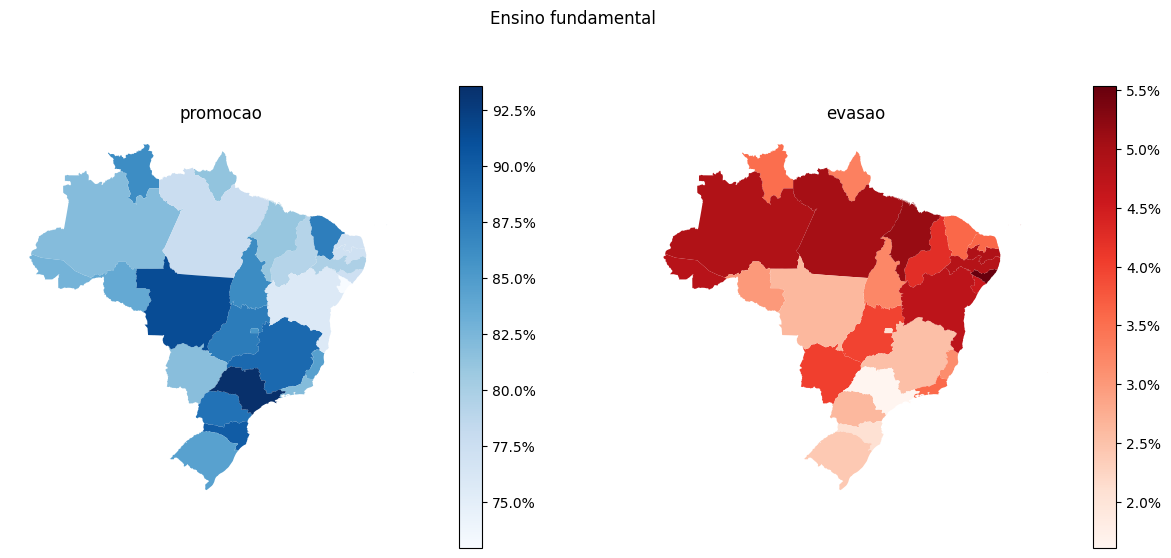

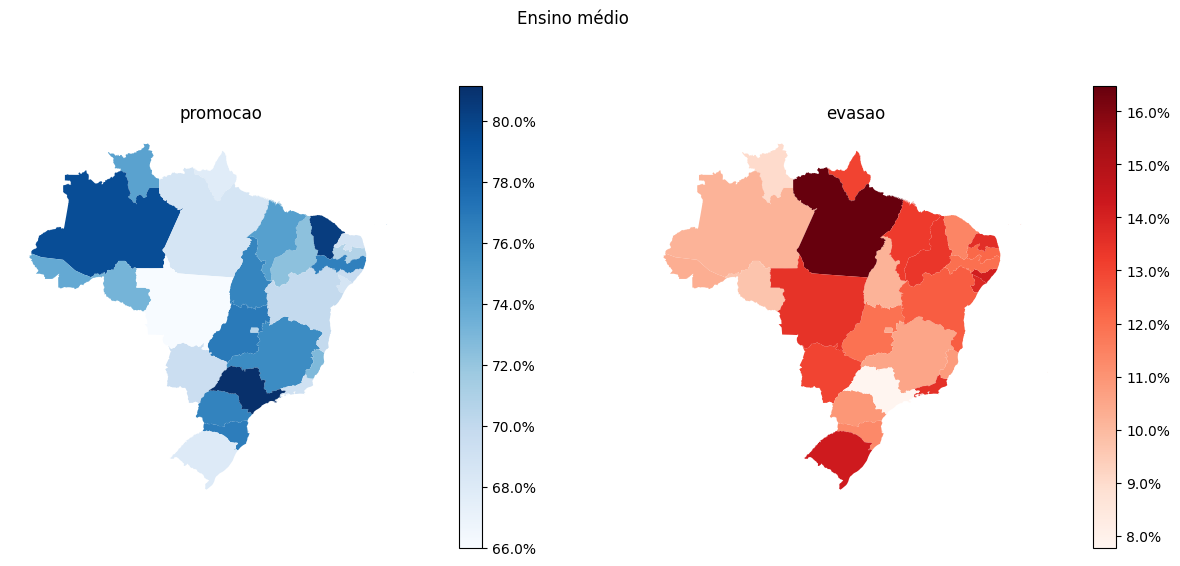

In [40]:
colors = ["Blues", "Reds"]
for ensino in coord_ibge["ensino"].unique():
    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    for i, taxaa in enumerate(["promocao", "evasao"]):

        # Removendo outliers
        lower = lower_bound.loc[ensino, taxaa]["valor"]
        upper = upper_bound.loc[ensino, taxaa]["valor"]

        coord_ibge.query(
            "taxa==@taxaa and ensino == @ensino and valor >= @lower and valor <= @upper"
        ).plot(
            ax=ax[i],
            column="valor",
            cmap=colors[i],
            legend=True,
            legend_kwds={"shrink": 0.4, "format": "{x}%"},
        )

        ax[i].set_title(taxaa)
        ax[i].axis("off")

    fig.suptitle(ensino, y=0.7)
    plt.show()

### Qual **região** tem a maior taxa de progressão e evasao ao longo dos anos?

Como vamos calcular a média, é necessário remover alguns outliers seguindo o mesmo método anterior, mas agora diferente pois precisamos olhar por ano ensino e taxa

In [43]:
gp = df_ensino_rede.groupby(["ano", "ensino", "taxa", "regiao"], observed=True)[
    ["valor"]
]

q1 = gp.quantile(0.25)
q3 = gp.quantile(0.75)

irq = (q3 - q1) * 1.5

lower_bound = q1 - irq
upper_bound = q3 + irq

print("Borda inferior")
display(lower_bound)

print("Borda superior")
display(upper_bound)

Borda inferior


valor
ano  ensino             taxa       regiao               
2008 Ensino fundamental promocao   Centro-Oeste  59.0500
                                   Nordeste      32.6125
                                   Norte         50.1125
                                   Sudeste       61.3500
                                   Sul           69.5875
...                                                  ...
2021 Ensino médio       repetencia Centro-Oeste  -3.7875
                                   Nordeste      -0.2625
                                   Norte         -3.1750
                                   Sudeste       -0.3625
                                   Sul           -2.6125

[420 rows x 1 columns]

Borda superior


valor
ano  ensino             taxa       regiao                
2008 Ensino fundamental promocao   Centro-Oeste  115.8500
                                   Nordeste      127.3125
                                   Norte         119.0125
                                   Sudeste       115.5500
                                   Sul           110.4875
...                                                   ...
2021 Ensino médio       repetencia Centro-Oeste   11.5125
                                   Nordeste        5.0375
                                   Norte           9.0250
                                   Sudeste         4.3375
                                   Sul             7.2875

[420 rows x 1 columns]

outliers

In [44]:
df_regiao = pd.DataFrame()
for col, bound in lower_bound.iterrows():
    up_bound = upper_bound.loc[col].values[0]
    lo_bound = bound.values[0]
    col = list(col)
    df_aux = df_ensino_rede.query(
        "ano == @col[0] and ensino == @col[1] and taxa == @col[2] and regiao == @col[3] and valor >= @lo_bound and valor <= @up_bound"
    )

    df_regiao = pd.concat([df_regiao, df_aux])

df_regiao = (
    df_regiao.groupby(["regiao", "ano", "ensino", "taxa"], observed=True)[["valor"]]
    .mean()
    .reset_index()
)

df_regiao

,regiao,ano,ensino,taxa,valor
0,Centro-Oeste,2008,Ensino fundamental,promocao,87.087500
1,Centro-Oeste,2008,Ensino fundamental,evasao,3.150000
2,Centro-Oeste,2008,Ensino fundamental,repetencia,8.637500
3,Centro-Oeste,2008,Ensino médio,promocao,76.837500
4,Centro-Oeste,2008,Ensino médio,evasao,10.550000
...,...,...,...,...,...
415,Sul,2021,Ensino fundamental,evasao,1.433333
416,Sul,2021,Ensino fundamental,repetencia,1.566667
417,Sul,2021,Ensino médio,promocao,89.933333
418,Sul,2021,Ensino médio,evasao,6.433333


Com a tabela acima foi gerado o gráfico a seguir

> Para o ensino fundamental a menor taxa de promoção é no nordeste que também possui uma maior taxa de evasão, demonstrando que os alunos neste estado possuem mai dificuldade de seguir as aulas
>
> Para o ensino médio tanto promoção quanto evasão possuem taxas bem semelhantes para todas as regiões 

c:\Users\rafac\anaconda3\envs\ia376\Lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


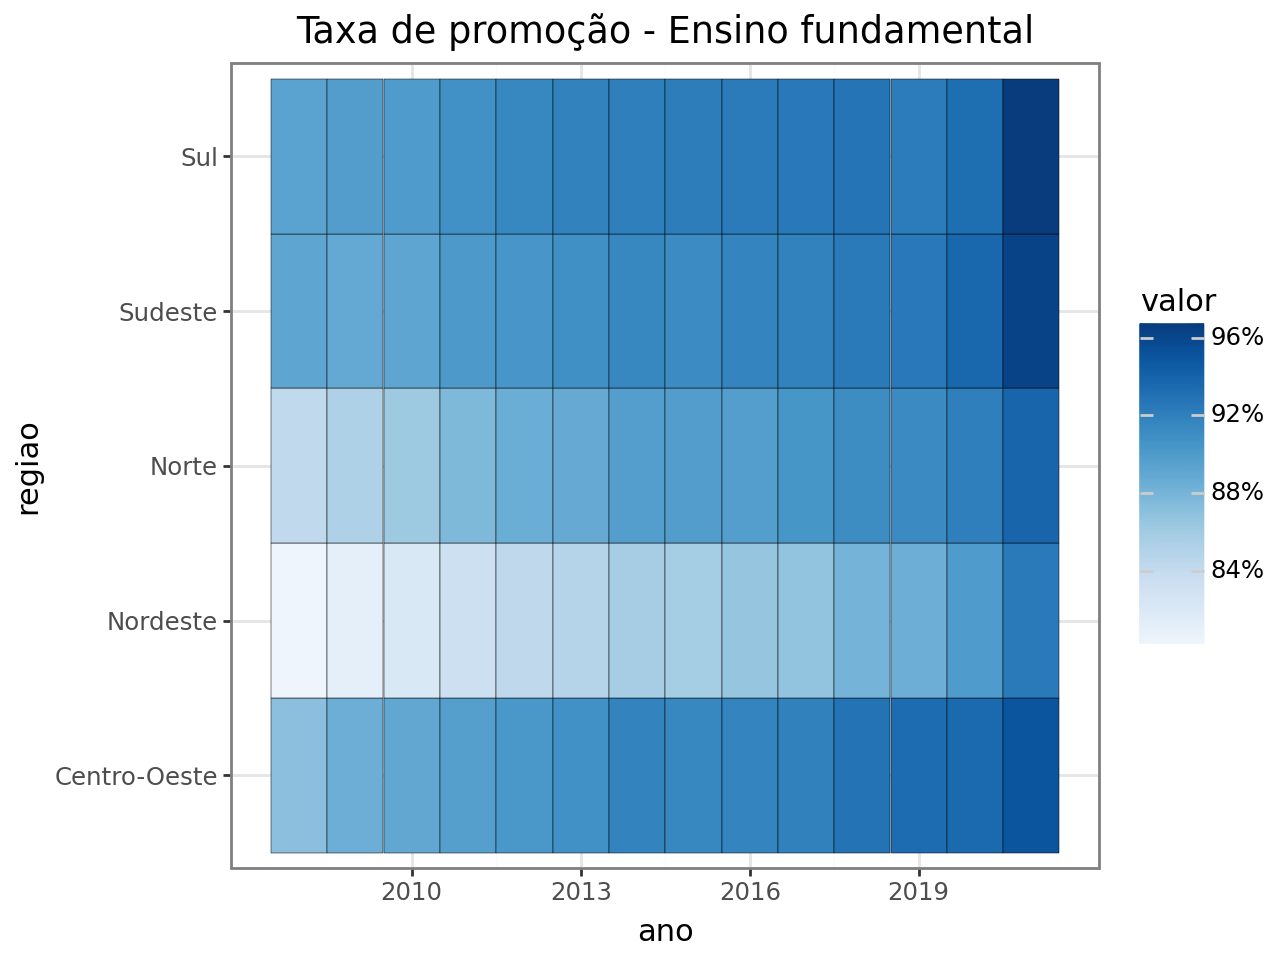

c:\Users\rafac\anaconda3\envs\ia376\Lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


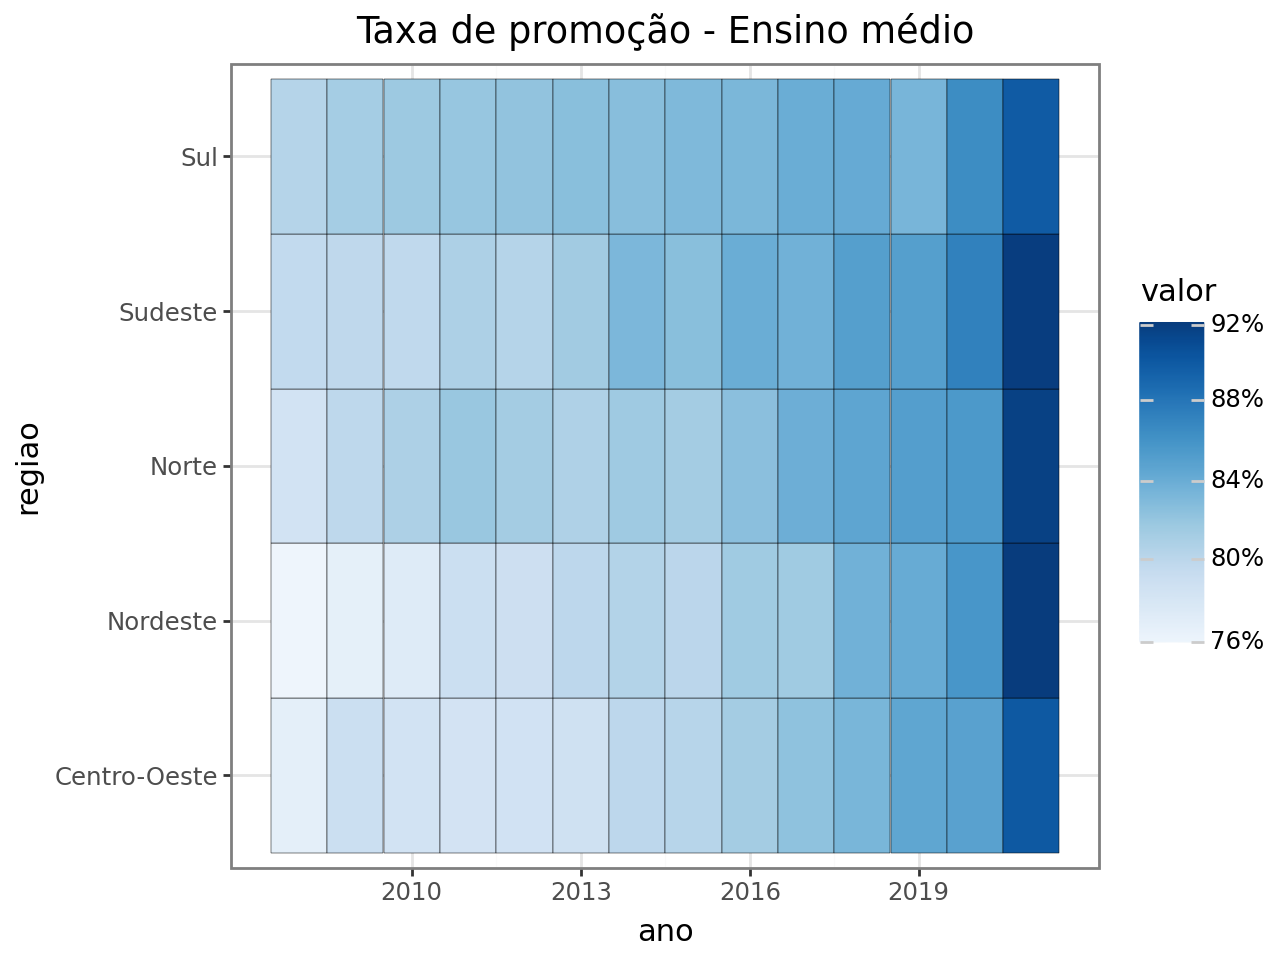

In [49]:
for ensino in df_regiao["ensino"].unique():
    display(
        ggplot(
            data=df_regiao.query("taxa=='promocao' and ensino == @ensino"),
            mapping=aes("ano", "regiao", fill="valor"),
        )
        + geom_tile(color="black")
        + scale_color_brewer(type="seq", palette=9)
        + scale_fill_gradientn(
            colors=sns.color_palette("Blues", n_colors=20),
            trans="sqrt",
            labels=label_number(suffix="%"),
        )
        + scale_x_continuous(trans="sqrt", breaks=(2010, 2013, 2016, 2019))
        + theme(
            panel_grid=element_blank(), legend_key="bottom", text=element_text(size=8)
        )
        + labs(title=f"Taxa de promoção - {ensino}")
        + theme_bw()
    )

c:\Users\rafac\anaconda3\envs\ia376\Lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


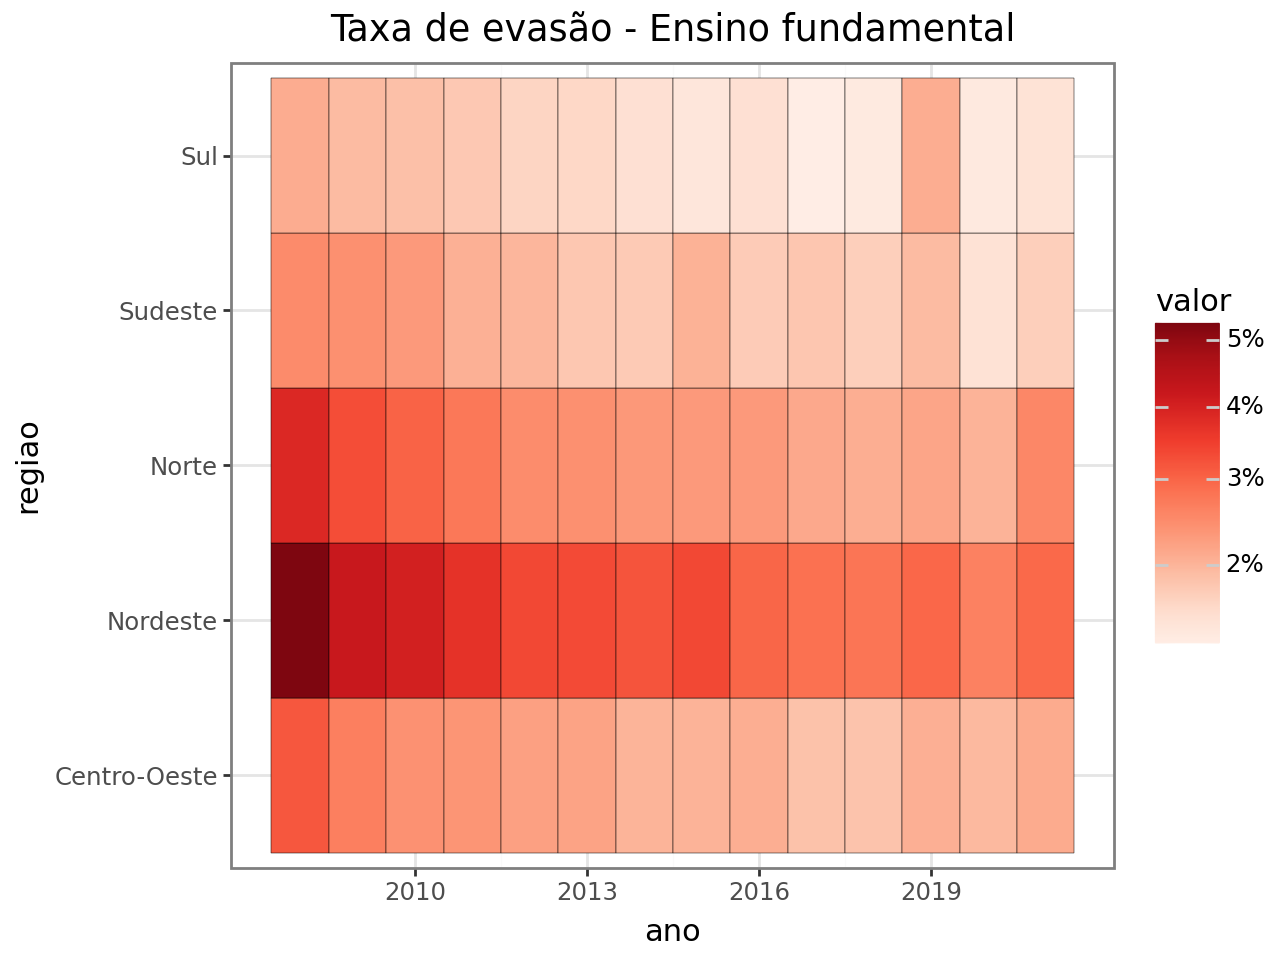

c:\Users\rafac\anaconda3\envs\ia376\Lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


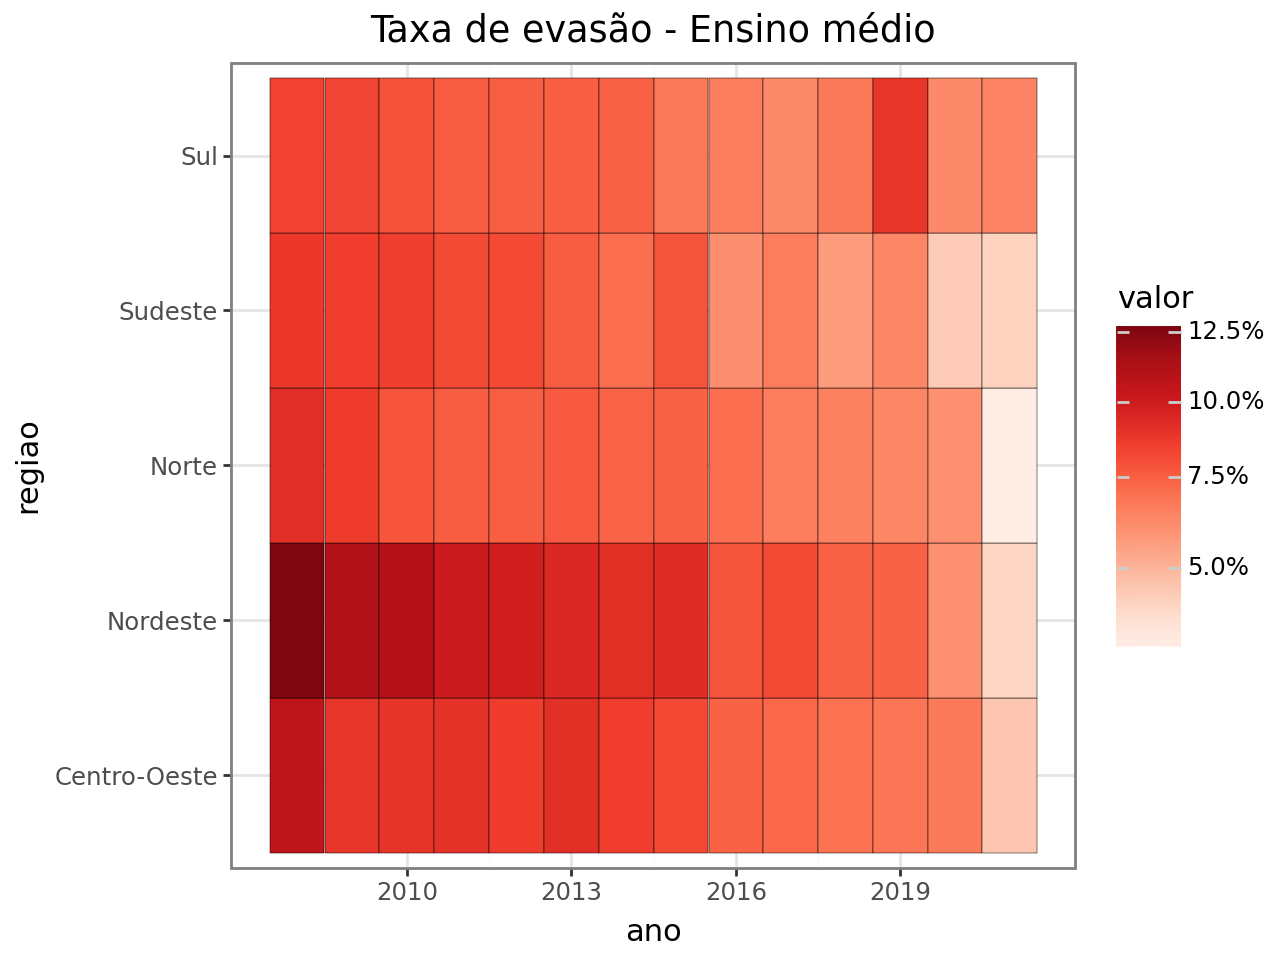

In [48]:
for ensino in df_regiao["ensino"].unique():
    display(
        ggplot(
            data=df_regiao.query("taxa=='evasao' and ensino == @ensino"),
            mapping=aes("ano", "regiao", fill="valor"),
        )
        + geom_tile(color="black")
        + scale_color_brewer(type="seq", palette=9)
        + scale_fill_gradientn(
            colors=sns.color_palette("Reds", n_colors=20),
            trans="sqrt",
            labels=label_number(suffix="%"),
        )
        + scale_x_continuous(trans="sqrt", breaks=(2010, 2013, 2016, 2019))
        + theme(
            panel_grid=element_blank(), legend_key="bottom", text=element_text(size=8)
        )
        + labs(title=f"Taxa de evasão - {ensino}")
        + theme_bw()
    )

## Como evoluiram as taxas de promoção, evasão e repetencia no primeiro ano de pandemia

Para ter uma noção inicial das taxas, primeiro foi plotado todas elas para veriguar se houve alguma grande diferença. Observando o gráfico abaixo podemos encontrar a explicação para aqueles 2 outliers presentes no box plot da promoção, eles aconteceram por conta da pandemia. Nesse ano as taxas de promoção foram mais altas no geral tanto para a rede pública quanto privada.

No entanto, no ensino fundamental da rede privada essa taxa caiu, sendo muito diferente do que é visto no restante dos gráficos, ela caiu devido a repetencia ter sido mais alta, nos próximos gráficos vamos averiguar isso com mais detalhe.

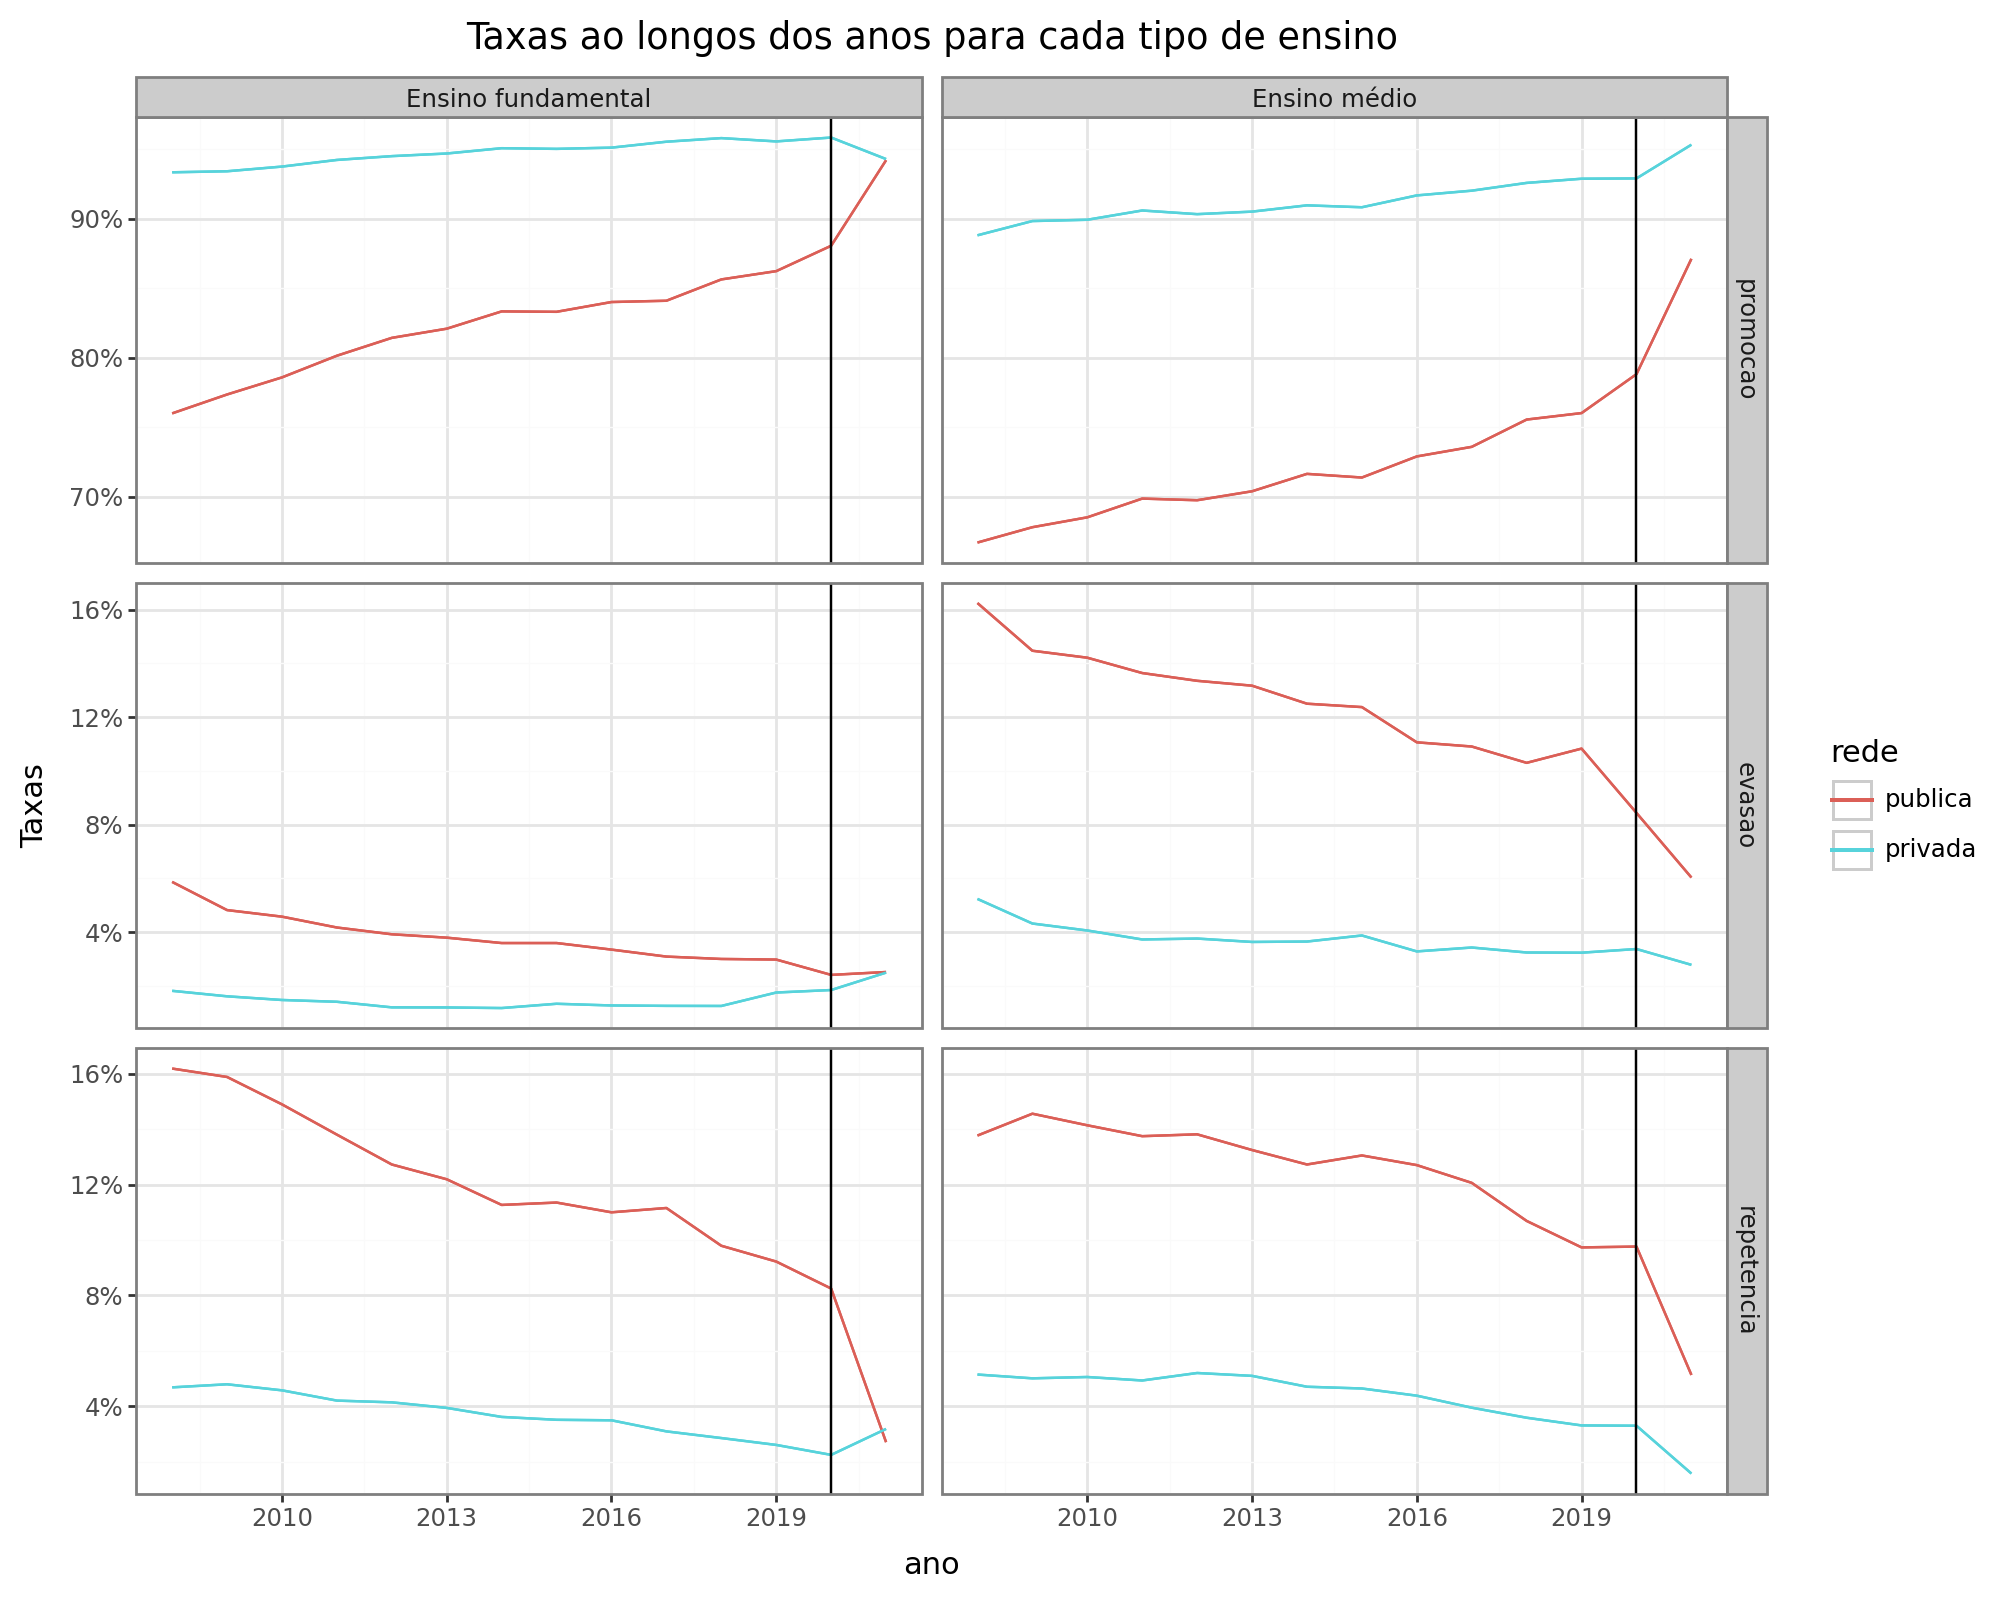

In [50]:
(
    ggplot(data=df_ensino_rede_gruop, mapping=aes(show_legend=True))
    + geom_line(mapping=aes(x="ano", y="valor", color="rede"))
    + geom_line(mapping=aes(x="ano", y="valor", color="rede"))
    + scale_y_continuous(labels=label_number(suffix="%"))
    + facet_grid("taxa", "ensino", scales="free")
    + geom_vline(xintercept=2020, color="black")
    + ylab(f"Taxas")
    + theme_bw()
    + theme(figure_size=(10, 8))
    + labs(title="Taxas ao longos dos anos para cada tipo de ensino")
)

Antes de plotar os gráficos, é necessário montar uma tabela com os dados para cada ano do ensino fundamental. Essa tabela será criada a partir do dado raw

In [51]:
taxa = "repetencia"
ensino = "ef"
ano_graph = [2019, 2020, 2021]
taxa_type = f"taxa_{taxa}"


df_ensino_ano = df_raw.query("rede!='total' & localizacao=='total' & ano in @ano_graph")
df_ensino_ano = df_ensino_ano.filter(
    regex=(rf"(^{taxa_type}_{ensino}_\d_.*)|(^rede)|(^ano)")
)

df_plot = pd.DataFrame()

cols = df_ensino_ano.filter(regex=(rf"(^{taxa_type}_{ensino}_\d_.*)")).columns

for col in cols:
    df_aux = df_ensino_ano[["rede", "ano"]].copy()
    df_aux.loc[:, "taxa"] = df_ensino_ano[col]
    df_aux.loc[:, "ensino_ano"] = re.search(r"\d", col)[0]

    df_plot = pd.concat([df_plot, df_aux])

df_plot = (
    df_plot.groupby(["rede", "ensino_ano", "ano"], observed=True)[["taxa"]]
    .mean()
    .reset_index()
)

df_plot.head()

,rede,ensino_ano,ano,taxa
0,publica,1,2019,2.870370
1,publica,1,2020,2.451852
2,publica,1,2021,1.966667
3,publica,2,2019,4.474074
4,publica,2,2020,4.174074


No gráficos a seguir pode se obsevar que para a rede publica em 2019 e 2020 as taxas de repetencia para todos os anos são maiores, mas em 2020 todas caíram, demonstrando assim que a politica adotada naquele ano foi de aprovar os alunos apesar do desempenho escolar.

> Ainda para a rede pública, interessante notar como a cada 3 anos a taxa de repetência é elevada, devido ao fim do ciclo a aprovação continuada.
>
> Para a rede privada aconteceu o contrário, houve um aumento na taxa de repetencia para os primeiros anos, podemos inferir a partir disso que os alunos desses anos tiveram uma maior dificuldade para acompanhar as aulas, muito provavelmente em virtude de não terem habilidades ainda com computadores e celulares ou por não ter a mesma capacidade de concentração de um adulto para acompanhar as aulas de casa.

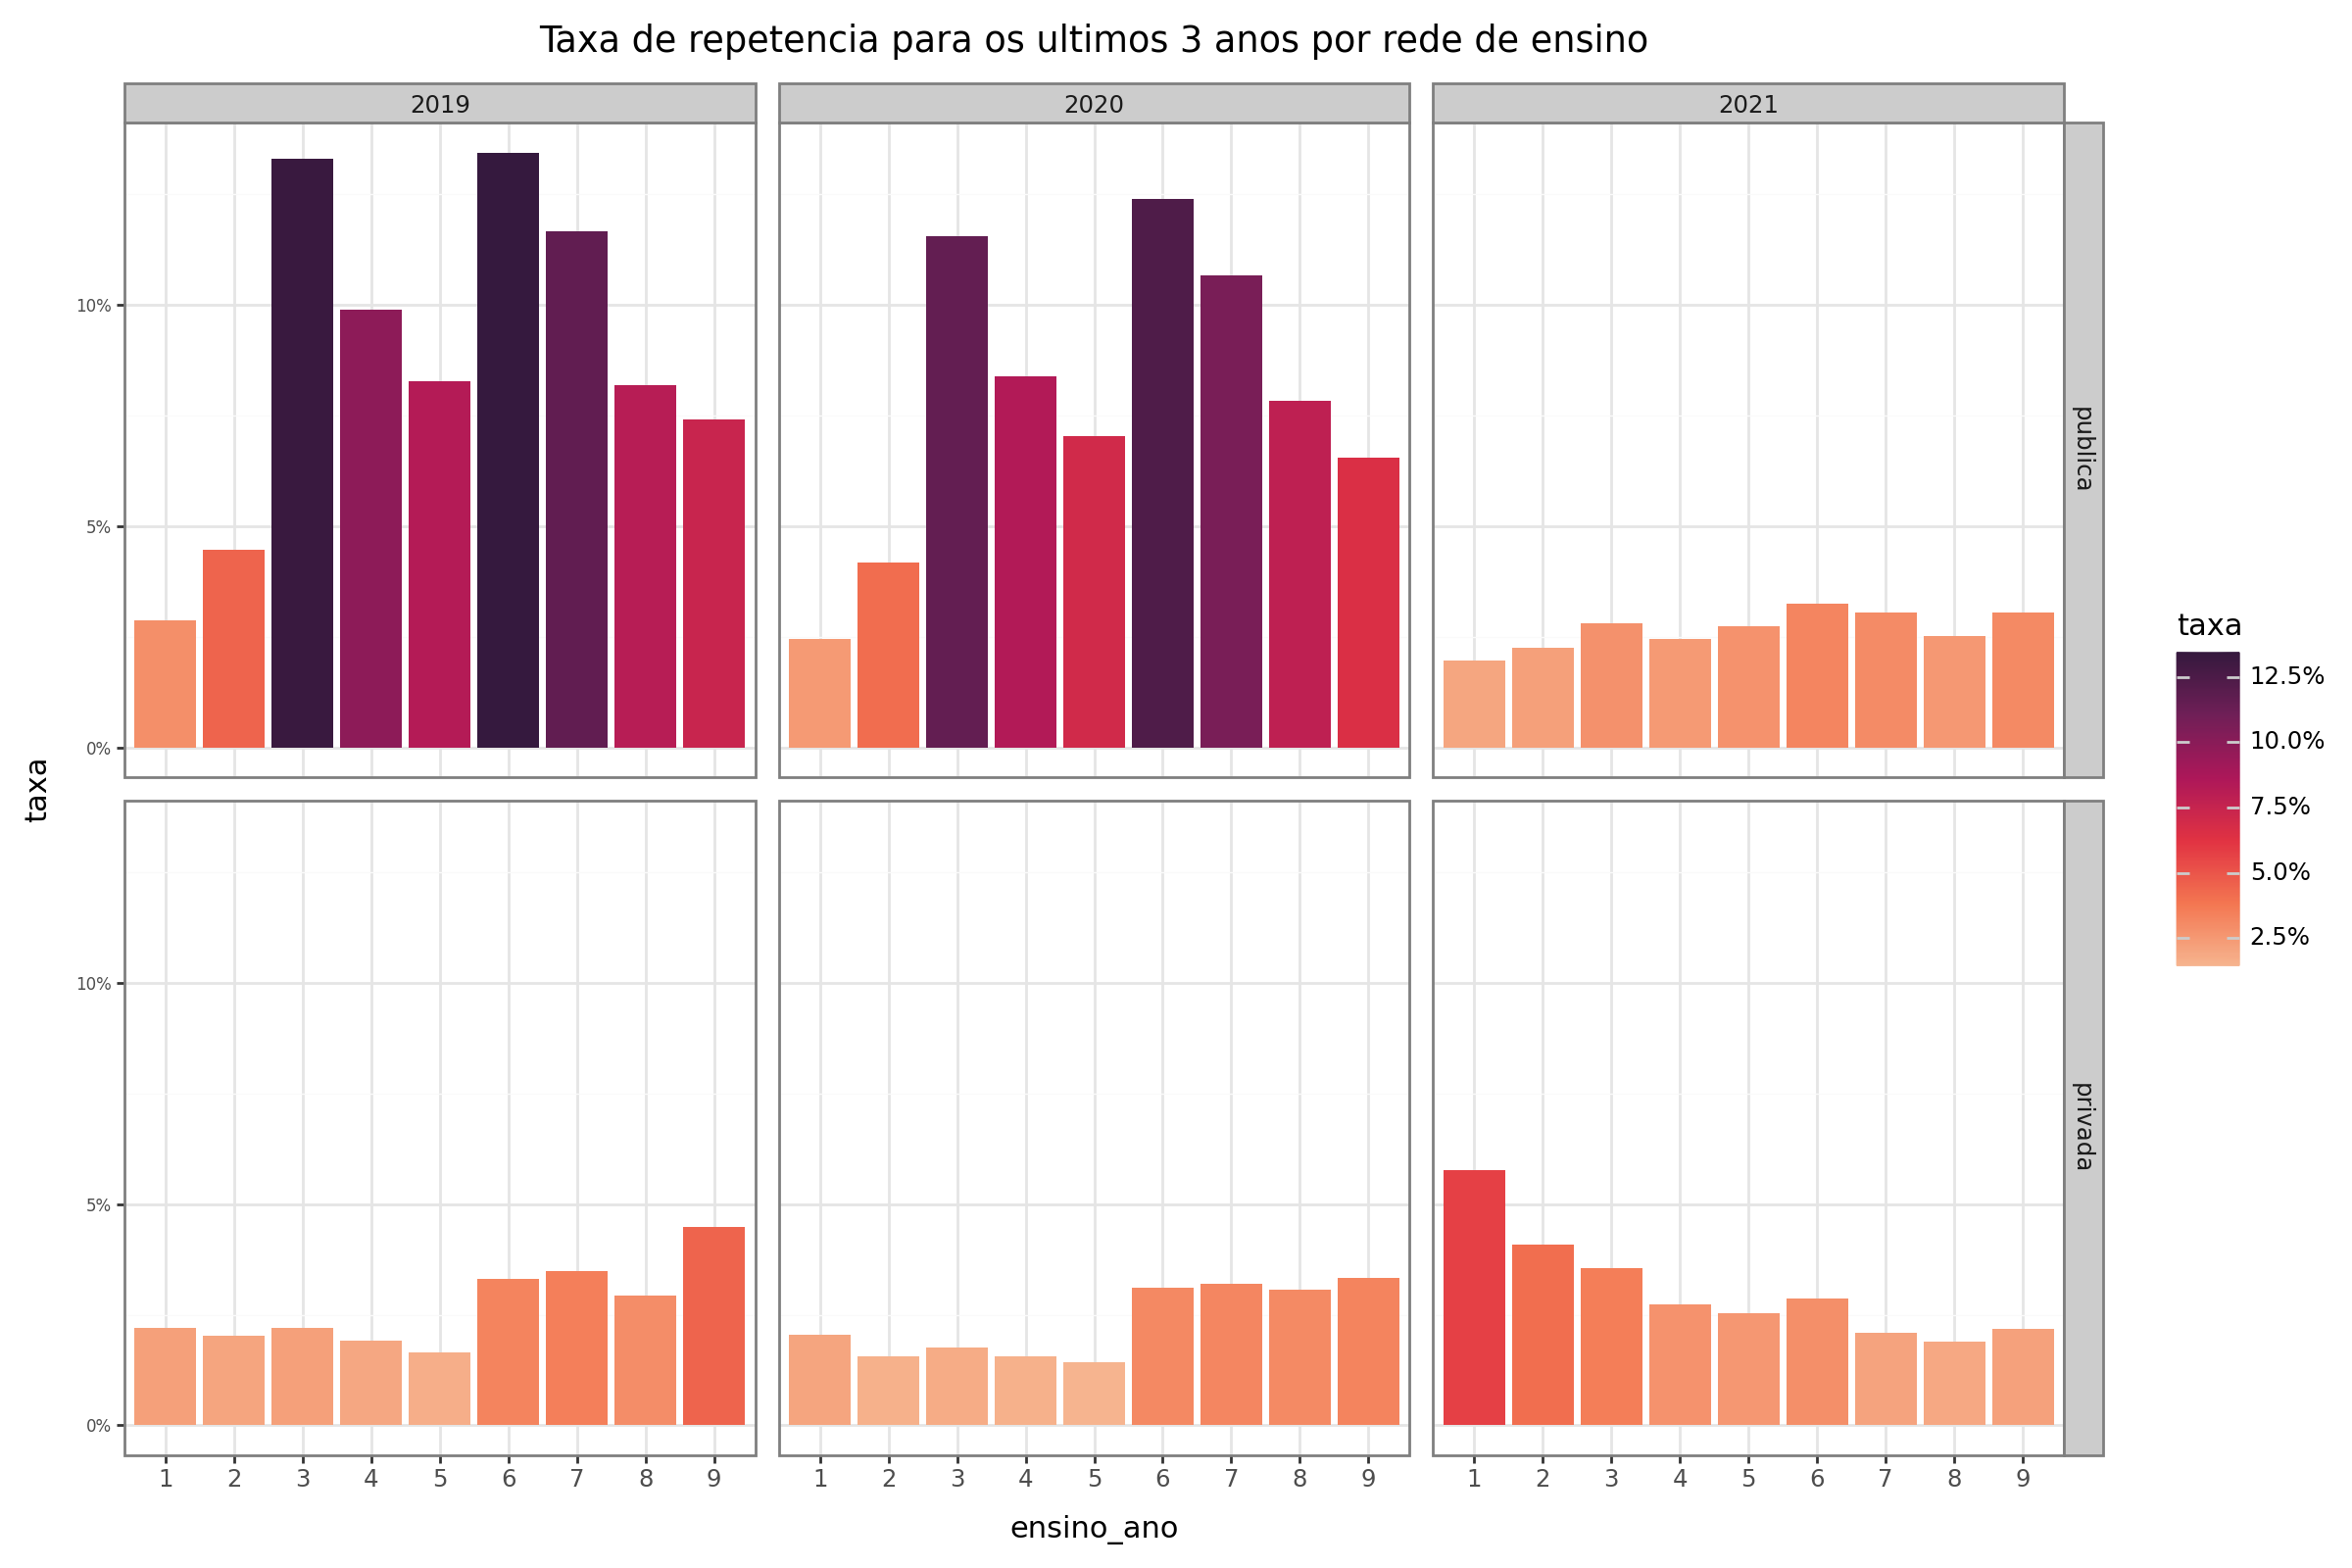

In [52]:
(
    ggplot(
        data=df_plot,
        mapping=aes("ensino_ano", f"taxa", fill="taxa"),
    )
    + geom_bar(stat="identity")
    + scale_fill_gradientn(
        colors=sns.color_palette("rocket_r"), labels=label_number(suffix="%")
    )
    + scale_y_continuous(labels=label_number(suffix="%"))
    + facet_grid("rede", "ano")
    + ggtitle(ano_graph)
    + theme_bw()
    + theme(figure_size=(12, 8), axis_text_y=element_text(size=6))
    + labs(title="Taxa de repetencia para os ultimos 3 anos por rede de ensino")
)

## Hipótese: **As escolas públicas possuem maior taxa de progressão do que as privadas**

Analisando o gráfico plotado anteriormente, a reposta é **não**, durante todo o período analisado a taxa de aprovação foi maior para as escola da rede privada, mostrando que apesar da aprovação continuada, na rede publica os alunos não são aprovados automaticamente, contudo ao longo dos anos se percebe um aumento na taxa de promoção, que pode indicar que o ensino melhorou ou que o ensino está "afrouxando" a analise de desempenho dos alunos para aumentar essa taxa. 

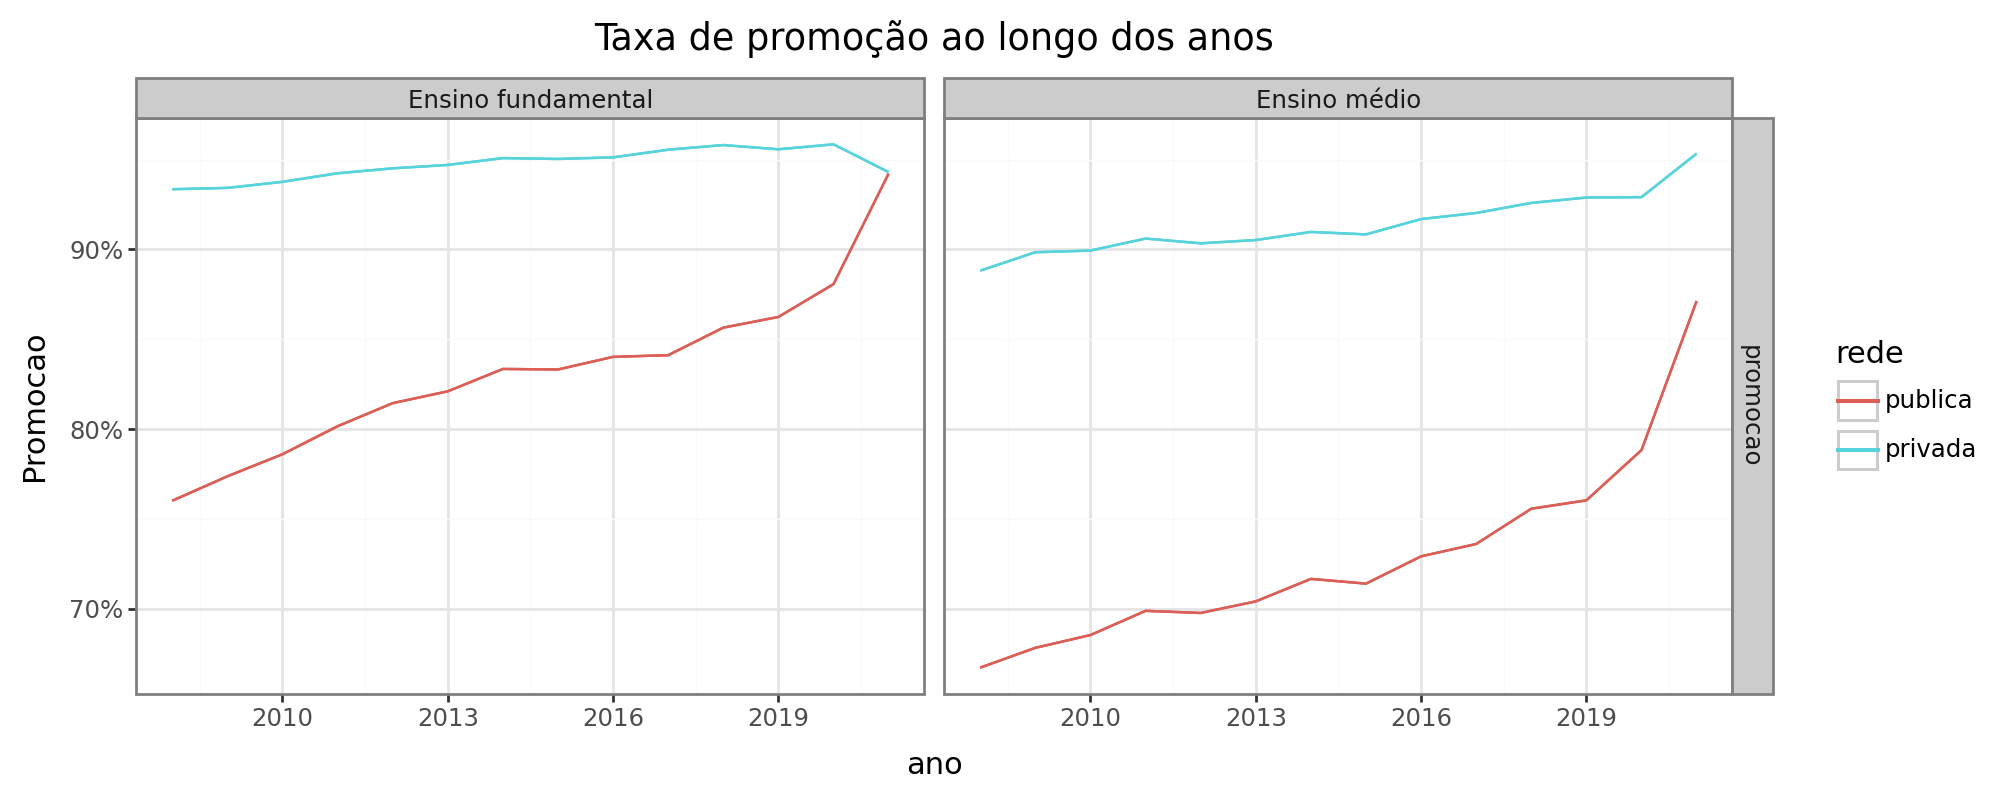

In [54]:
(
    ggplot(
        data=df_ensino_rede_gruop.query("taxa == 'promocao'"),
        mapping=aes(show_legend=True),
    )
    + geom_line(mapping=aes(x="ano", y="valor", color="rede"))
    + geom_line(mapping=aes(x="ano", y="valor", color="rede"))
    + scale_y_continuous(labels=label_number(suffix="%"))
    + facet_grid("taxa", "ensino", scales="free")
    + theme_bw()
    + theme(figure_size=(10, 4))
    + labs(title="Taxa de promoção ao longo dos anos", y="Promocao")
)

### Como funciona a progressão continuada

Aproveitando para ir mais a fundo na nossa analise podemos verificar a questão da chamada progressão continuada entre dois estados.

Foi escolhido Parana e São Paulo, por possuirem politicas diferentes e economias parecidas.

Fonte: [BBC - progressão continuada](https://www.bbc.com/portuguese/articles/c72y0zqnvk1o)

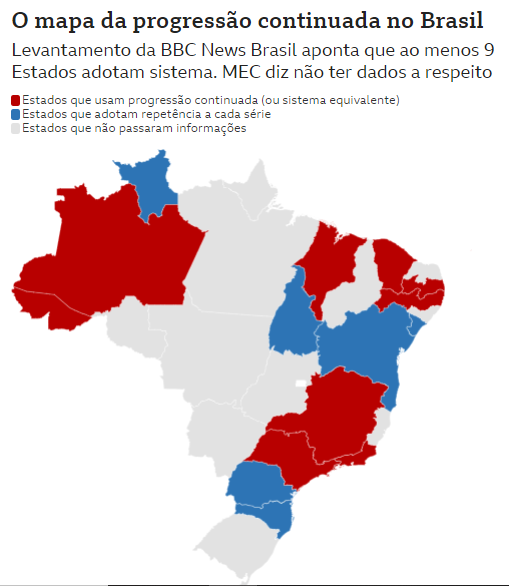

Primeiramente analisando a taxa ao longo dos anos, podemos ver que em SP devido a politica ela sobe de forma mais **acentuada**, principalmente para o ensino médio, enquanto no Paraná a taxa fica abaixo de 80% até 2019 e subiu provavelmente por conta da pandemia

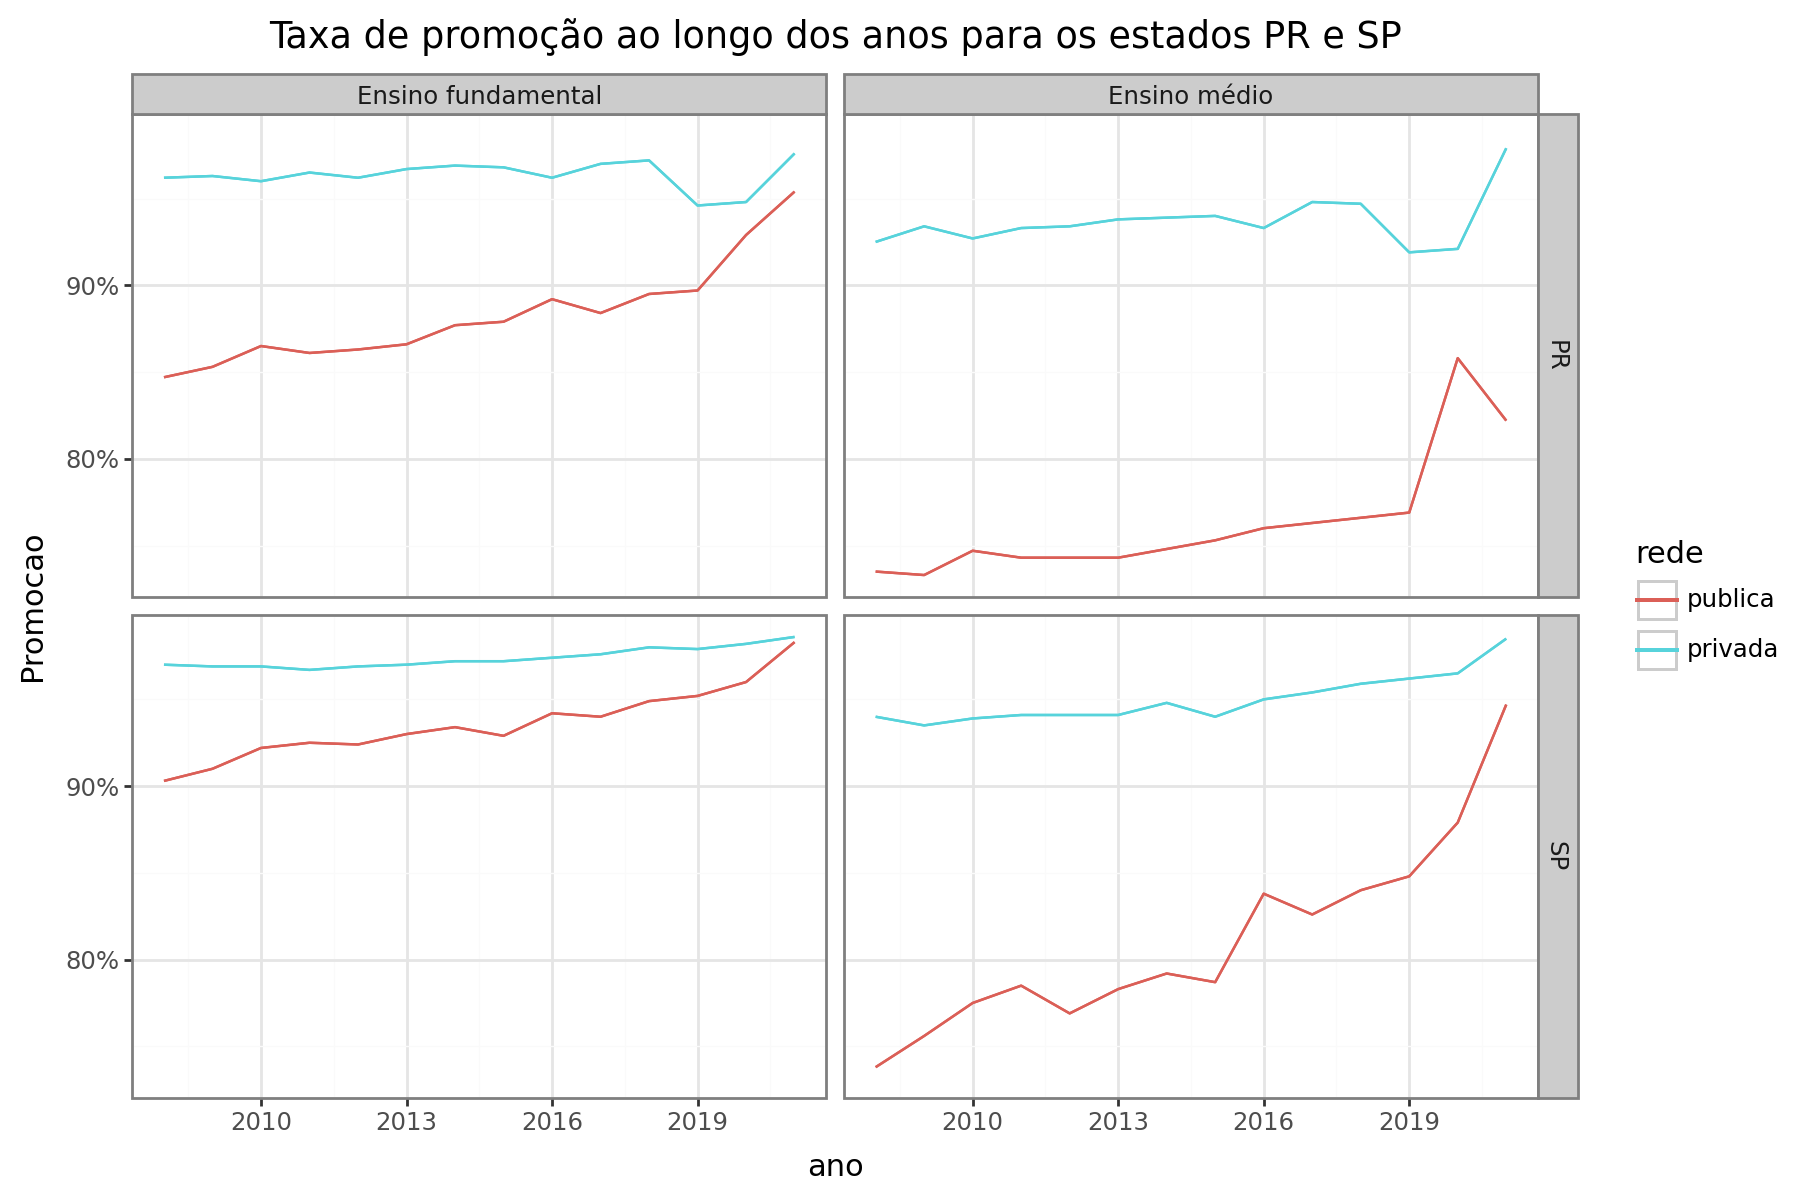

In [25]:
df_SP = (
    df_ensino_rede.query("sigla_uf in ['SP', 'PR'] and taxa == 'promocao'")
    .groupby(["rede", "ensino", "sigla_uf", "ano"], observed=True)[["valor"]]
    .mean()
    .reset_index()
)

(
    ggplot(data=df_SP, mapping=aes(show_legend=True))
    + geom_line(mapping=aes(x="ano", y="valor", color="rede"))
    + geom_line(mapping=aes(x="ano", y="valor", color="rede"))
    + scale_y_continuous(labels=label_number(suffix="%"))
    + facet_grid("sigla_uf", "ensino")
    + ylab(f"Taxas")
    + theme_bw()
    + theme(figure_size=(9, 6))
    + labs(
        title="Taxa de promoção ao longo dos anos para os estados PR e SP", y="Promocao"
    )
)

Antes de plotar os gráficos, é necessário montar uma tabela com os dados para cada ano do ensino fundamental e estado Parana e São Paulo. Essa tabela será criada a partir do dado raw

In [55]:
taxa = "repetencia"
ensino = "ef"
ano_graph = [2017, 2018, 2019]
taxa_type = f"taxa_{taxa}"


df_ensino_ano = df_raw.query(
    "rede!='total' & sigla_uf in ['SP', 'PR'] & localizacao=='total' & ano in @ano_graph"
)
df_ensino_ano = df_ensino_ano.filter(
    regex=(rf"(^{taxa_type}_{ensino}_\d_.*)|(^sigla_uf)|(^ano)")
)

df_plot = pd.DataFrame()

cols = df_ensino_ano.filter(regex=(rf"(^{taxa_type}_{ensino}_\d_.*)")).columns

for col in cols:
    df_aux = df_ensino_ano[["sigla_uf", "ano"]].copy()
    df_aux.loc[:, "taxa"] = df_ensino_ano[col]
    df_aux.loc[:, "ensino_ano"] = re.search(r"\d", col)[0]

    df_plot = pd.concat([df_plot, df_aux])

df_plot = (
    df_plot.groupby(["sigla_uf", "ensino_ano", "ano"], observed=True)[["taxa"]]
    .mean()
    .reset_index()
)

df_plot.head()

,sigla_uf,ensino_ano,ano,taxa
0,PR,1,2017,2.40
1,PR,1,2018,2.05
2,PR,1,2019,2.30
3,PR,2,2017,5.35
4,PR,2,2018,5.15


O gráfico a seguir apresenta muito bem como a progressão continuada funciona, em SP a cada ciclo de 3 anos há um significativo aumento na repetencia, enquanto no Parana a taxa ao longo dos anos é bem definida e costuma ser mais alta nos últimos anos do ensino médio.

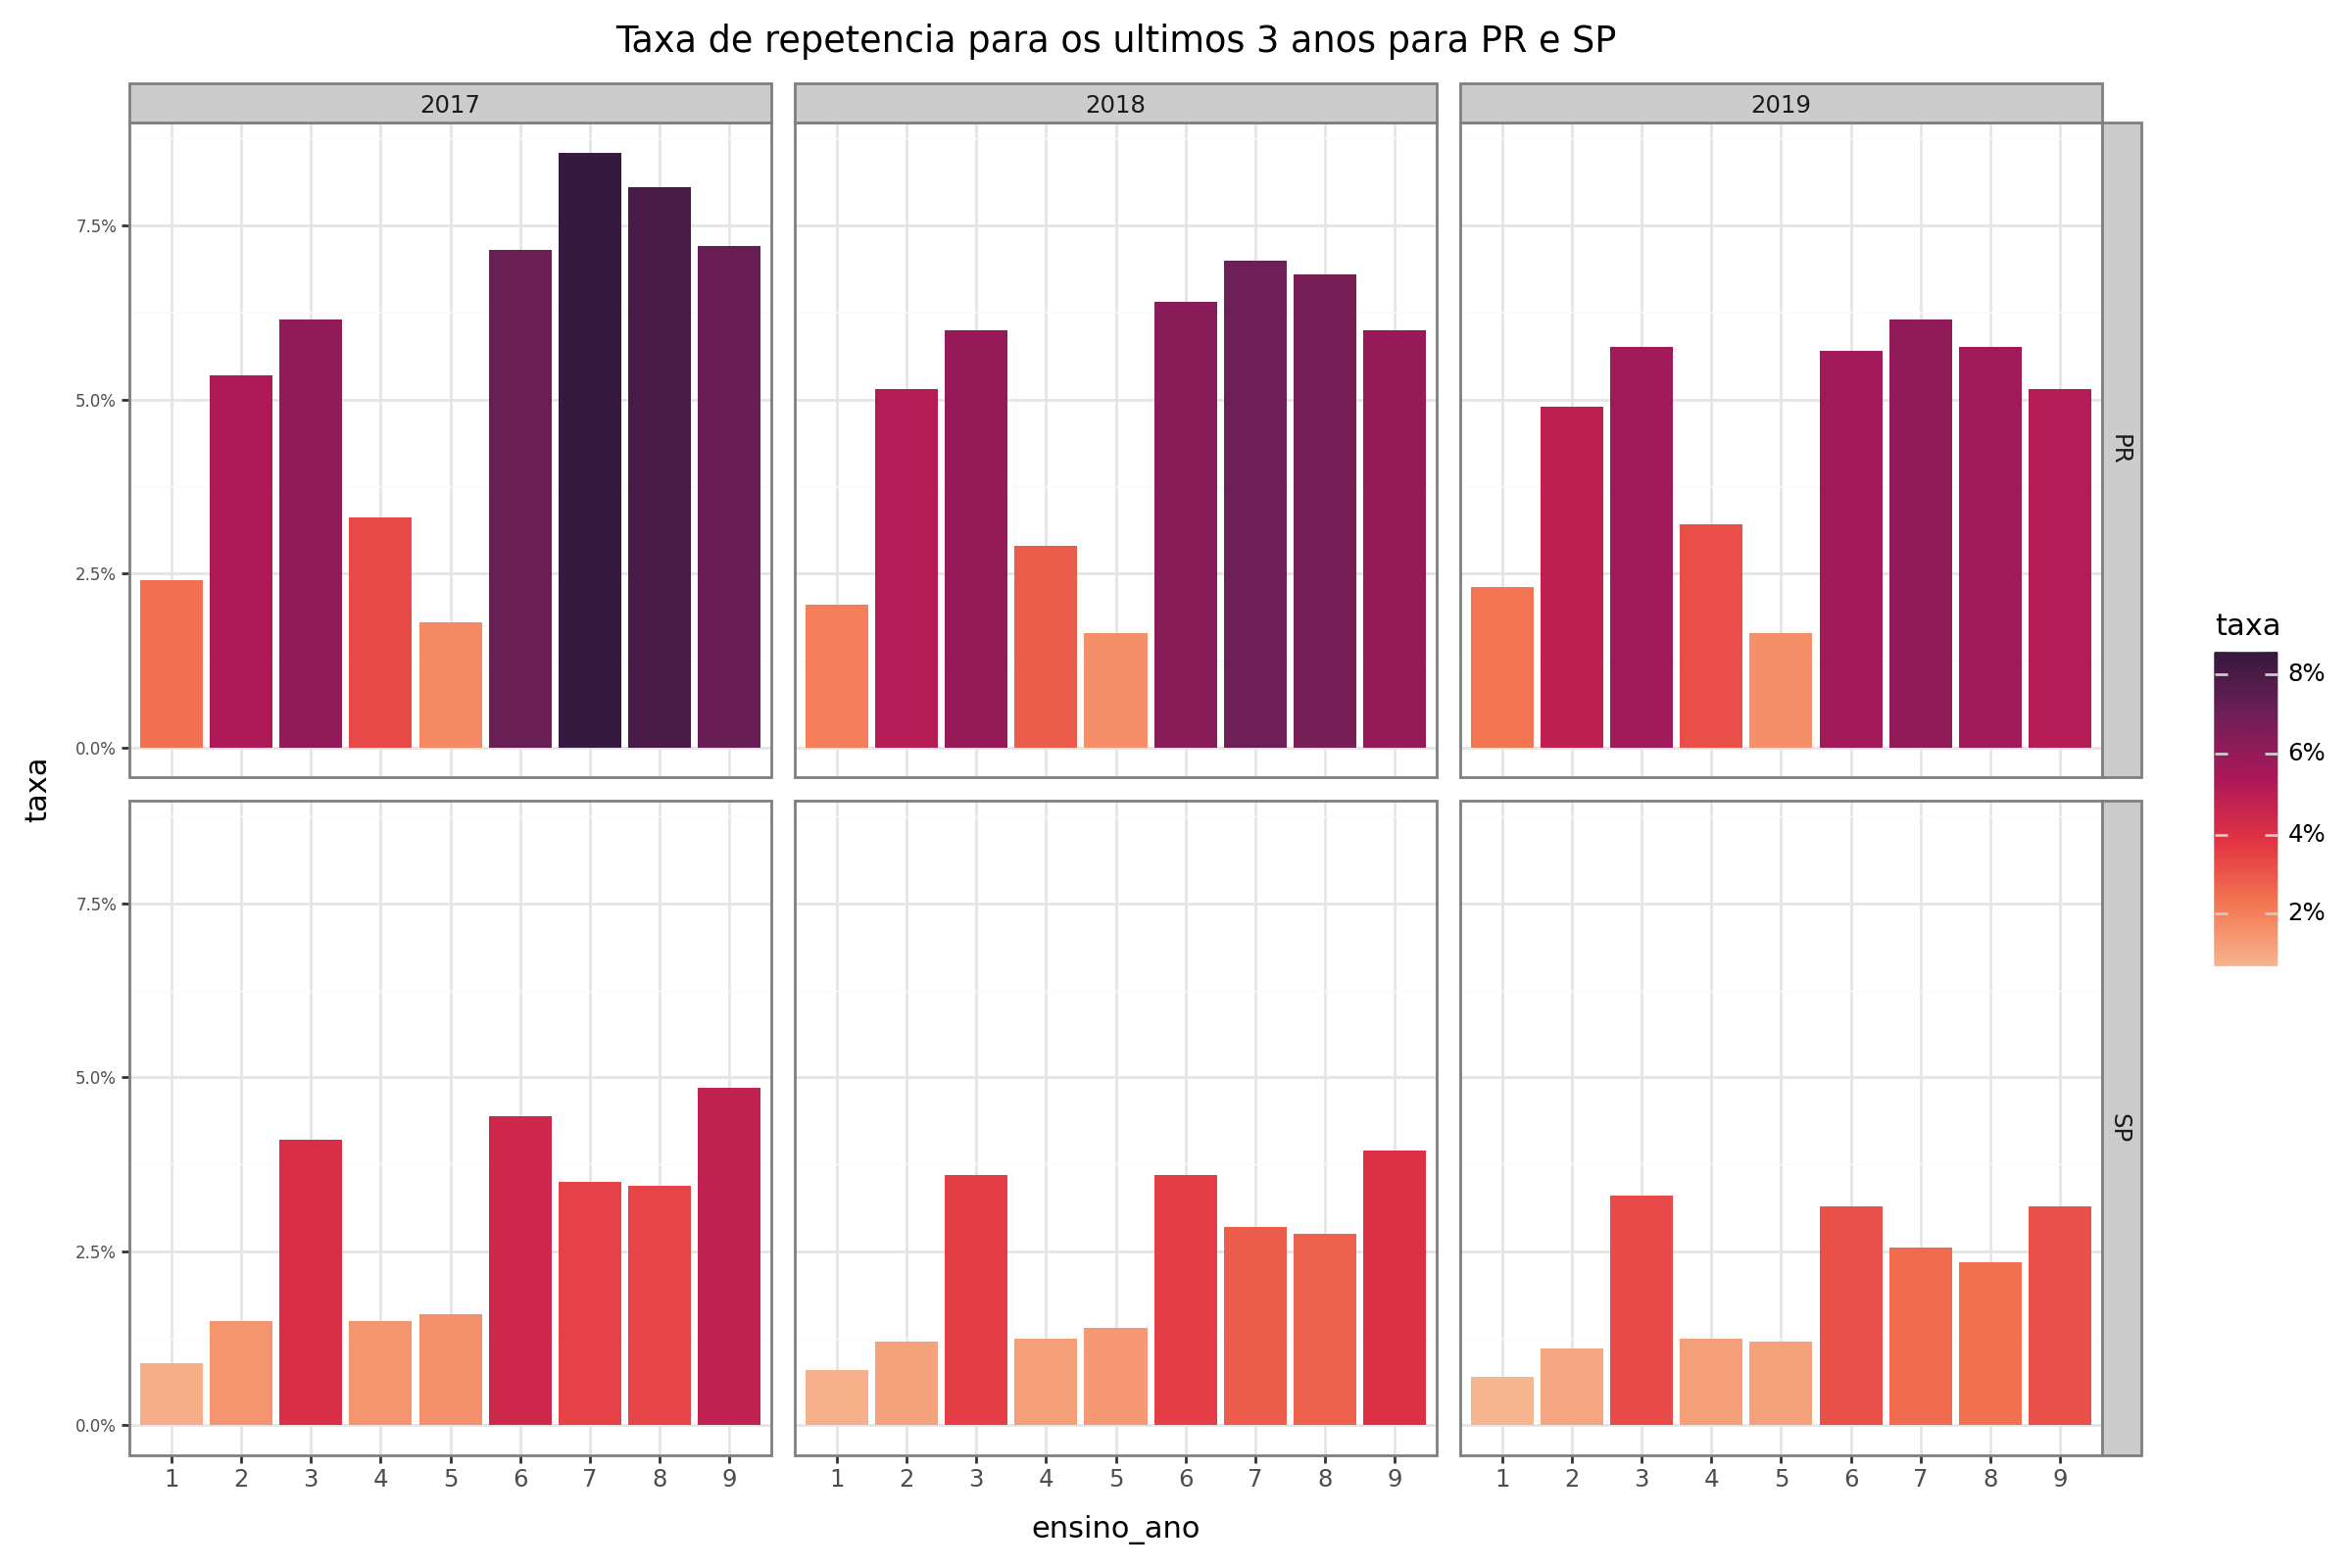

In [56]:
(
    ggplot(
        data=df_plot,
        mapping=aes("ensino_ano", f"taxa", fill="taxa"),
    )
    + geom_bar(stat="identity")
    + scale_fill_gradientn(
        colors=sns.color_palette("rocket_r"), labels=label_number(suffix="%")
    )
    + scale_y_continuous(labels=label_number(suffix="%"))
    + facet_grid("sigla_uf", "ano")
    + ggtitle(ano_graph)
    + theme_bw()
    + theme(figure_size=(12, 8), axis_text_y=element_text(size=6))
    + labs(title="Taxa de repetencia para os ultimos 3 anos para PR e SP")
)

# Conclusão

A partir das análises acima podemos tirar as seguintes conslusões:
- A rede privada possui um IRQ menor em todas as suas taxas, portanto, seus alunos possuem um desepenho mais homegeneo ao longo do anos e entre todos os estados
- A região nordeste possui uma taxa de promoção bem menor e alta evasão quando comparada com outras regiões, que pode acontecer devido a falta de estrutura e recursos para educação no estado
- O Ceará é um outlier da região nordeste, pois possui indices melhores que seus vizinhos.
- Apesar do que todo mundo pensa a rede pública não possui uma régua baixa para aprovar os alunos.
- Ao longo de 2020, no primeiro ano de pandemia, houve um aumento significtivo da taxa de promoção na rede pública
- A progressão continuada existe e faz com que os estados que a possuem tenham uma taxa de aprovação mais alta do que outros.
- A hipótese estava errada e a rede privadas possuem uma taxa de promoção maior